# DATOS FALTANTES

## EL PROBLEMA CON LOS DATOS FALTANTES

In [1]:
import pandas as pd
import numpy as np

try:
  # Print the sum of two None's
  print("Add operation output of 'None': ", None + None)

except TypeError:
  # Print if error
  print("'None' does not support Arithmetic Operations!!")

'None' does not support Arithmetic Operations!!


In [2]:
try:
  # Print the output of logical OR of two None's
  print("OR operation output of 'None': ", None or None)

except TypeError:
  # Print if error
  print("'None' does not support Logical Operations!!")

OR operation output of 'None':  None


In [3]:
try:
  # Print the output of logical OR of two None's
  print("OR operation output of 'None': ", None or None)

except TypeError:
  # Print if error
  print("'None' does not support Logical Operations!!")

OR operation output of 'None':  None


In [4]:
try:
  # Print the output of logical OR of two np.nan's
  print("OR operation output of 'np.nan': ", np.nan or np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Logical Operations!!")

OR operation output of 'np.nan':  nan


In [5]:
try:
  # Print the comparison of two 'None's
  print("'None' comparison output: ", None == None)

except TypeError:
  # Print if error
  print("'None' does not support this operation!!")

'None' comparison output:  True


In [6]:
try:
  # Print the comparison of two 'np.nan's
  print("'np.nan' comparison output: ", np.nan == np.nan)

except TypeError:
  # Print if error  
  print("'np.nan' does not support this operation!!")

'np.nan' comparison output:  False


In [7]:
try:
  # Check if 'None' is 'NaN'
  print("Is 'None' same as nan? ", np.isnan(None))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

Function 'np.isnan()' does not support this Type!!


In [8]:
try:
  # Check if 'np.nan' is 'NaN'
  print("Is 'np.nan' same as nan? ", np.isnan(np.nan))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

Is 'np.nan' same as nan?  True


### Manejando datos faltantes

In [9]:
diabetes = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/pima-indians-diabetes data.csv")

print(diabetes.info())

print(diabetes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None
         Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  763.000000    733.000000  541.000000     394.000000   
mean     3.845052  121.686763     72.405184   29.153420     155.548223   
std      3.369578   30.535641     12.382158   10.476982     118.775855   
min      0.00000

In [10]:
# Store all rows of column 'BMI' which are equal to 0 
zero_bmi = diabetes.BMI[diabetes.BMI == 0]
print(zero_bmi)

# Set the 0 values of column 'BMI' to np.nan
diabetes.BMI[diabetes.BMI == 0] = np.nan

# Print the 'NaN' values in the column BMI
print(diabetes.BMI[np.isnan(diabetes.BMI)])

Series([], Name: BMI, dtype: float64)
9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64


<ipython-input-10-6e579303e6ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.BMI[diabetes.BMI == 0] = np.nan


### Cantidad de missingness

In [11]:
df_air = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

df_air.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


In [12]:
airquality_nullity = df_air.isnull()
airquality_nullity.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,False,False,False,False
1976-05-02,False,False,False,False
1976-05-03,False,False,False,False
1976-05-04,False,False,False,False
1976-05-05,True,True,False,False


In [13]:
# Calculate total of missing values
missing_values_sum = airquality_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

# Calculate percentage of missing values
missing_values_percent = airquality_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64
Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


<AxesSubplot:>

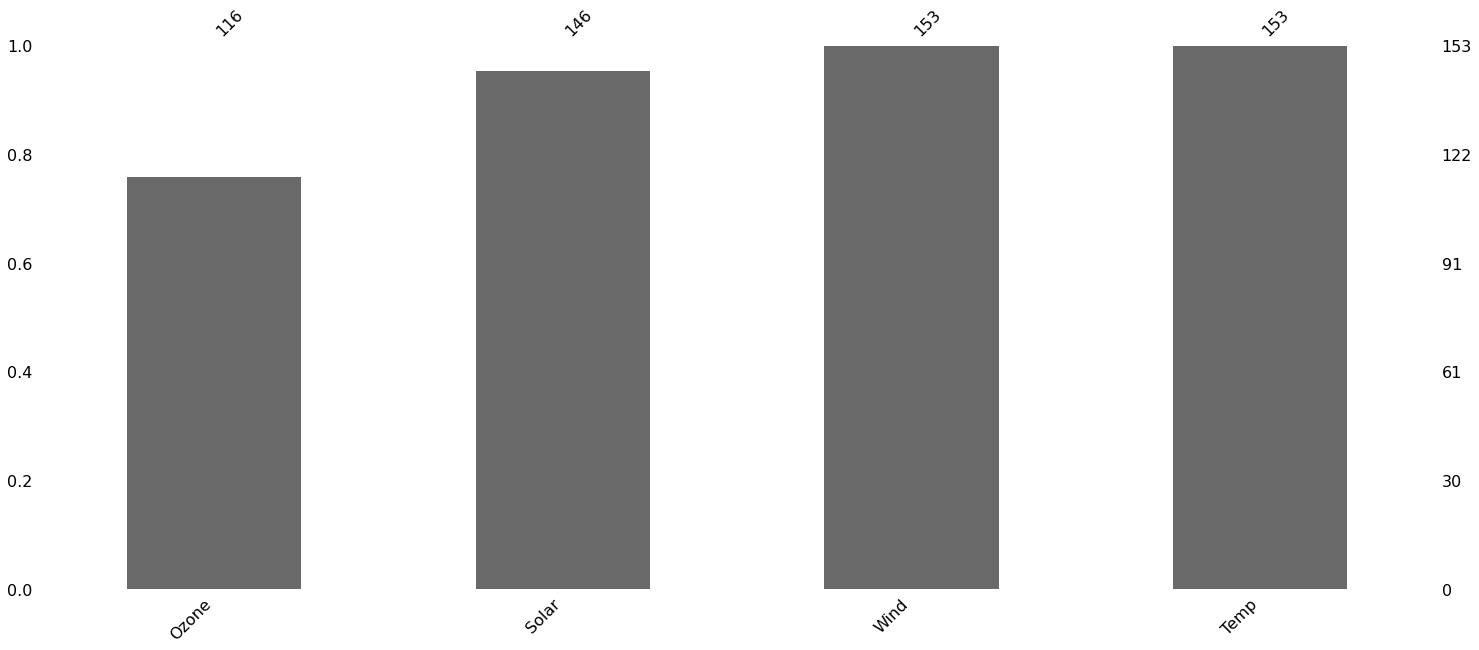

In [14]:
# Para visualizar:

import missingno as msno

msno.bar(df_air)

### Matriz de nulidad

<AxesSubplot:>

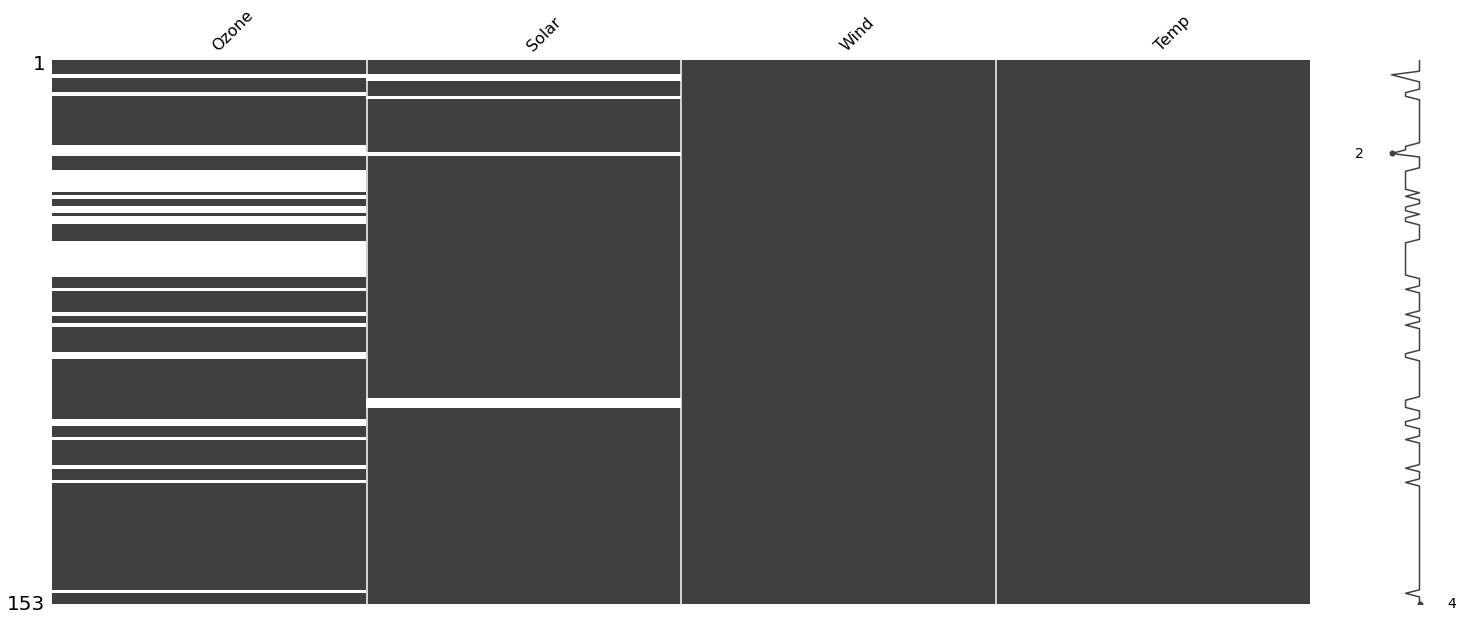

In [15]:
msno.matrix(df_air) # el número 2 indica el renglón con el mínimo número de NAs, el 4 indica el número de columnas del dataframe

<AxesSubplot:>

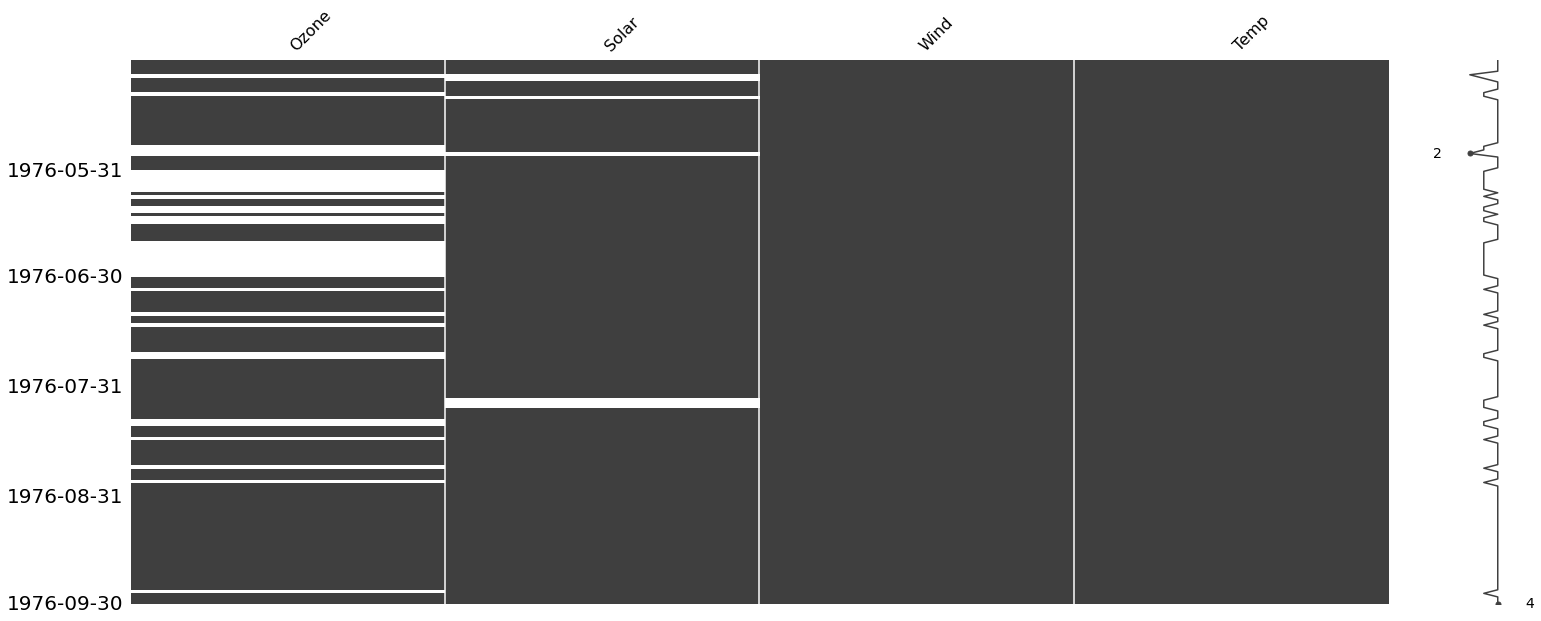

In [16]:
# El gráfico puede modificarse para observar por fecha:

msno.matrix(df_air, freq = "M")

<AxesSubplot:>

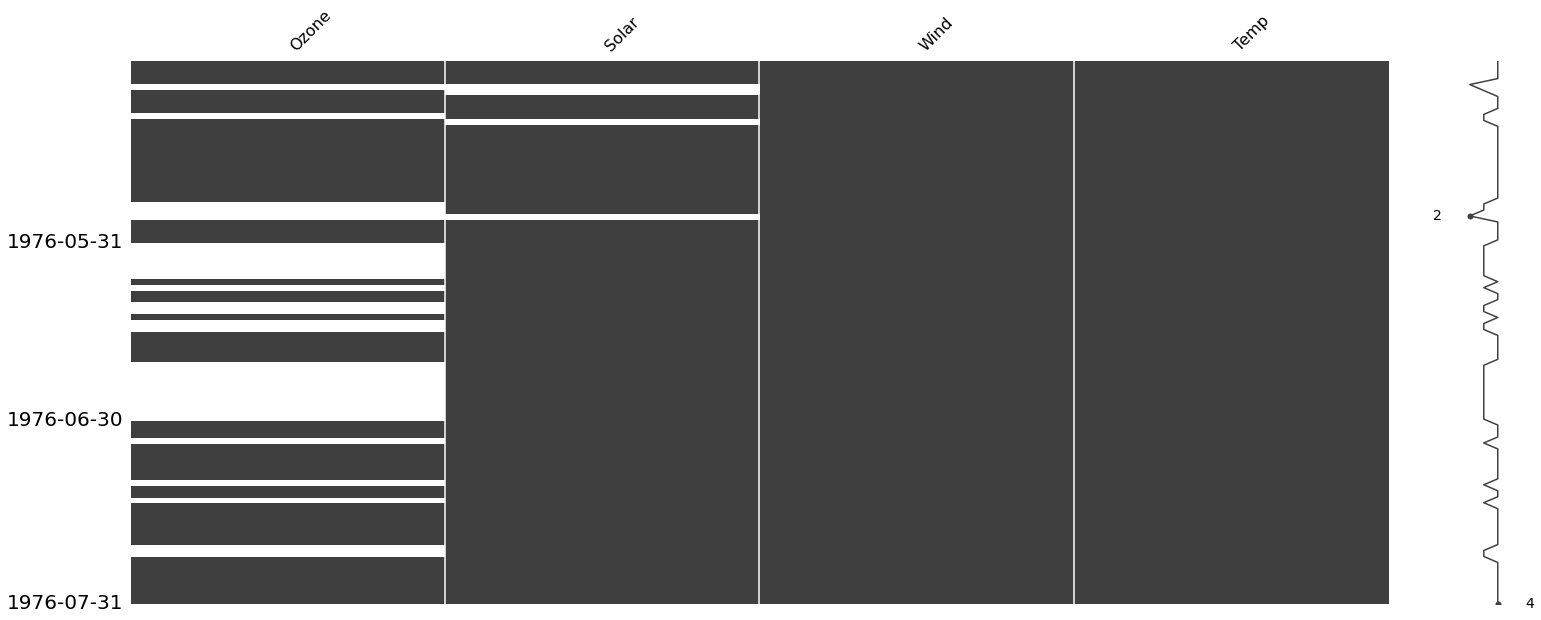

In [17]:
# Para lo cual se puede hacer un slice:

msno.matrix(df_air.loc["May-1976":"Jul-1976"], freq = "M")

## PATRONES

- MCAR: La falta de datos no tiene relación alguna entre ningún valor, observado o faltante.
- MAR: Relación sistemática entre la falta de datos y datos observados, pero no con los datos no observados.
- MNAR: Relación entre la falta de datos y sus valores, faltantes o no faltantes.

<AxesSubplot:>

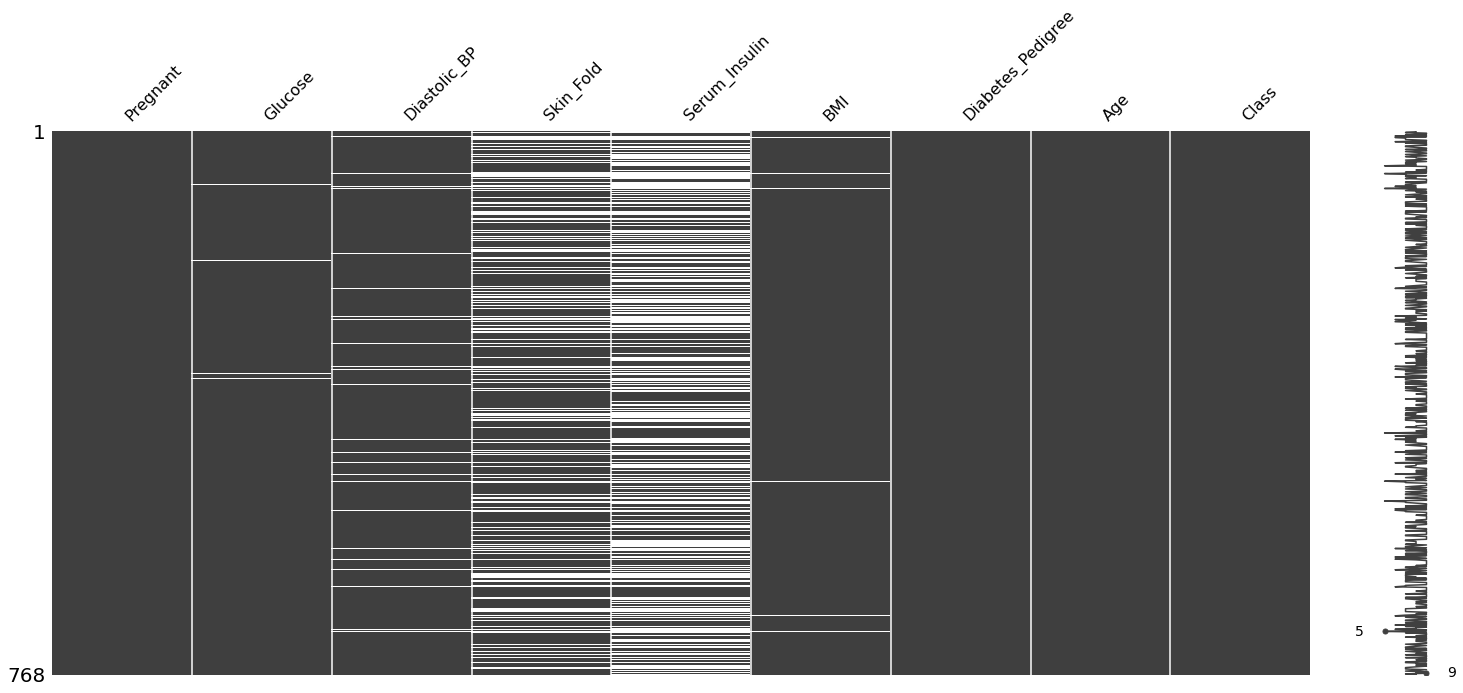

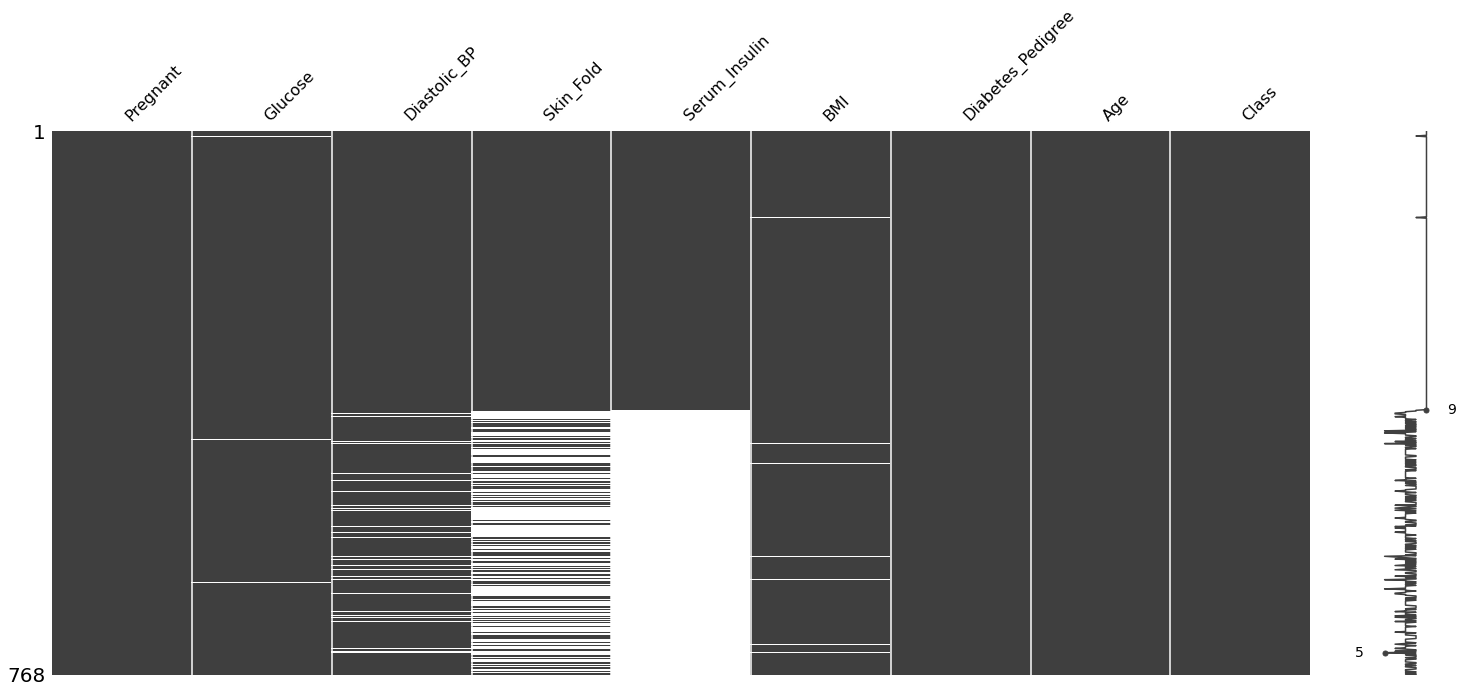

In [18]:
msno.matrix(diabetes)

sorted = diabetes.sort_values("Serum_Insulin")
msno.matrix(sorted)

### Missingness Heatmap

Ilustra la correlación de valores faltantes entre columnas y explica las dependencias de la fata de datos entre ellas. Mientras más azul, más correlación de falta de datos.

<AxesSubplot:>

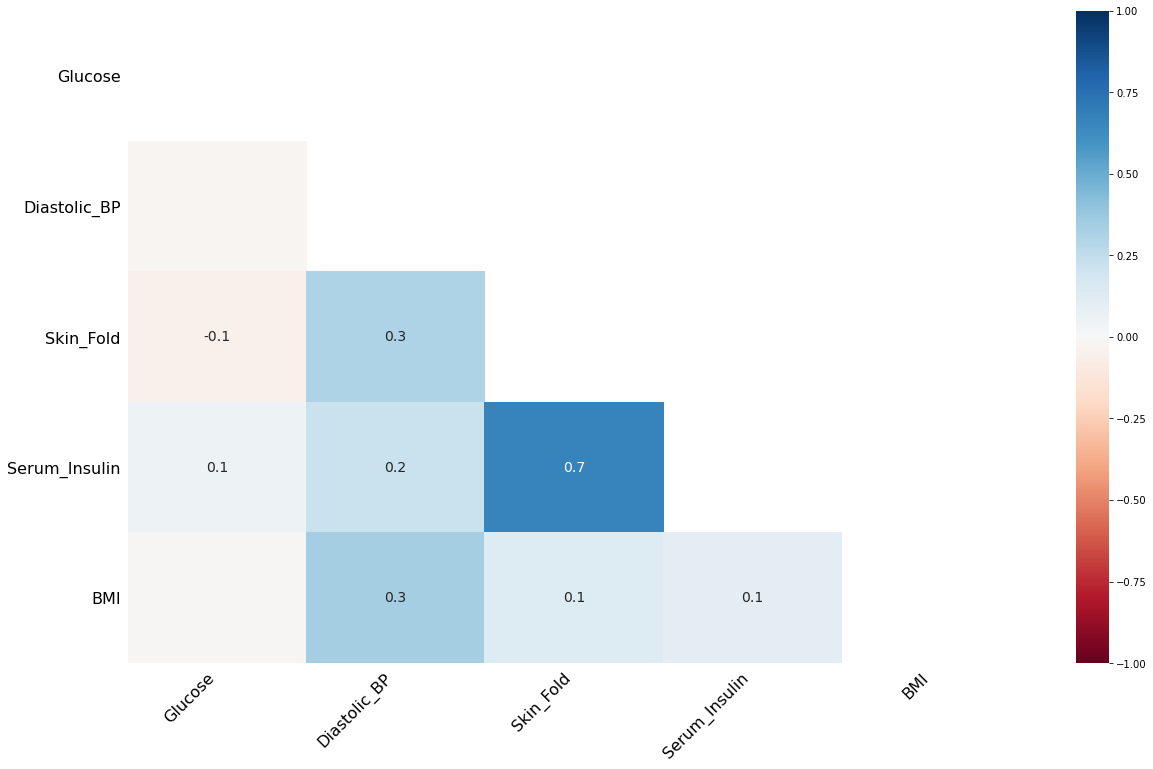

In [19]:
msno.heatmap(diabetes)

### Missingness Dendrogram

Es un diagrama de árbol de falta de datos que agrupa objetos similares en ramas cercanas. Describe la correlación de variables al agruparlas.

<AxesSubplot:>

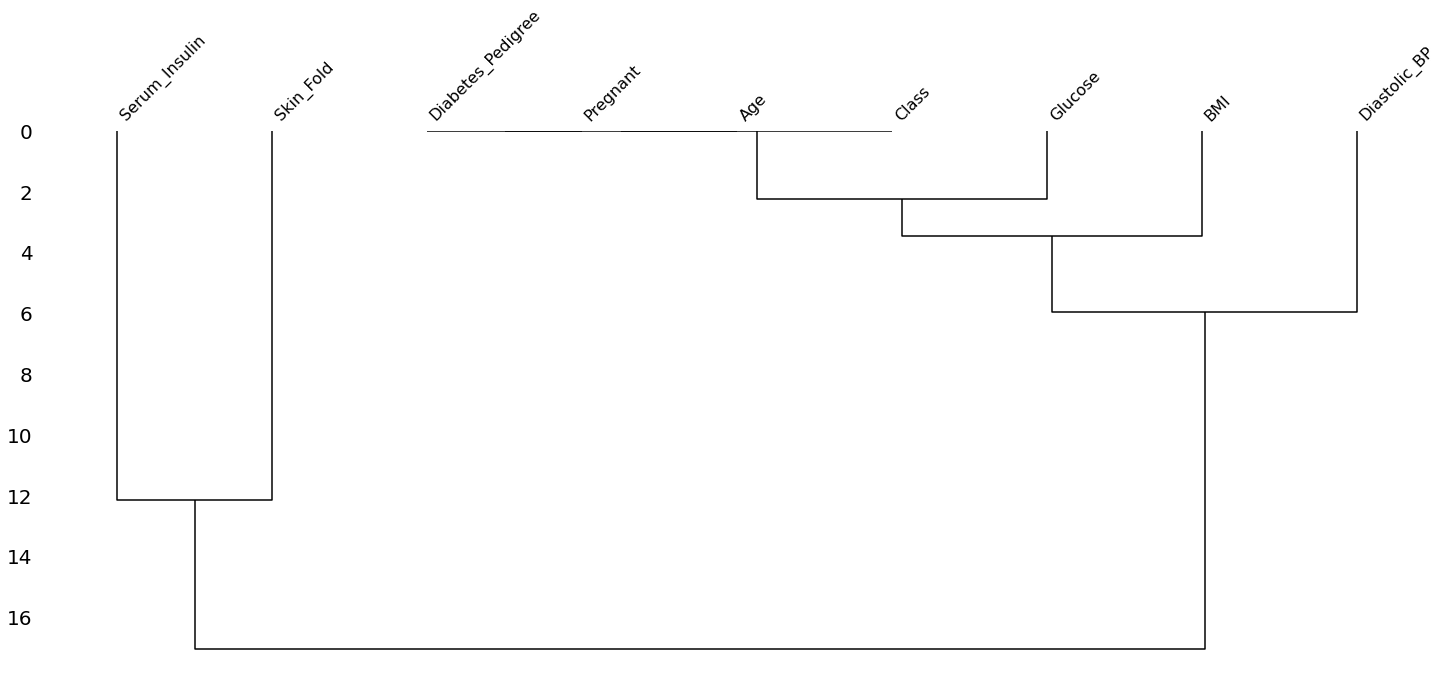

In [20]:
msno.dendrogram(diabetes)

### Visualización de missingness variables vs. variable

<ipython-input-21-e0621bae9d5e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col_null] = dummy_values


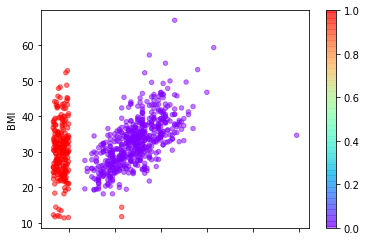

In [21]:
import matplotlib.pyplot as plt
from numpy.random import rand

def fill_dummy_values(df, scaling_factor=0.075):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
    # Scale the random values to scaling_factor times col_range
    dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
    col[col_null] = dummy_values
  return df_dummy


# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes['Skin_Fold'].isnull()|diabetes['BMI'].isnull()

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5,
                    
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, 
                    cmap='rainbow')

plt.show()

### Acciones ante NAs

Dos tipos de eliminación para MCAR:

1. Pairwise: Se omiten solo los valores que faltan.
2. Listwise: Se elimina la fila completa.

Por default, las operaciones de Pandas utilizan una eliminación de NAs del tipo pairwise, porque minimizan la pérdida de datos. Esto se logra usando el argumento how = "any" en la función dropna(). El argumento subset solo checará los NAs en las columnas indicadas.

5
11


<AxesSubplot:>

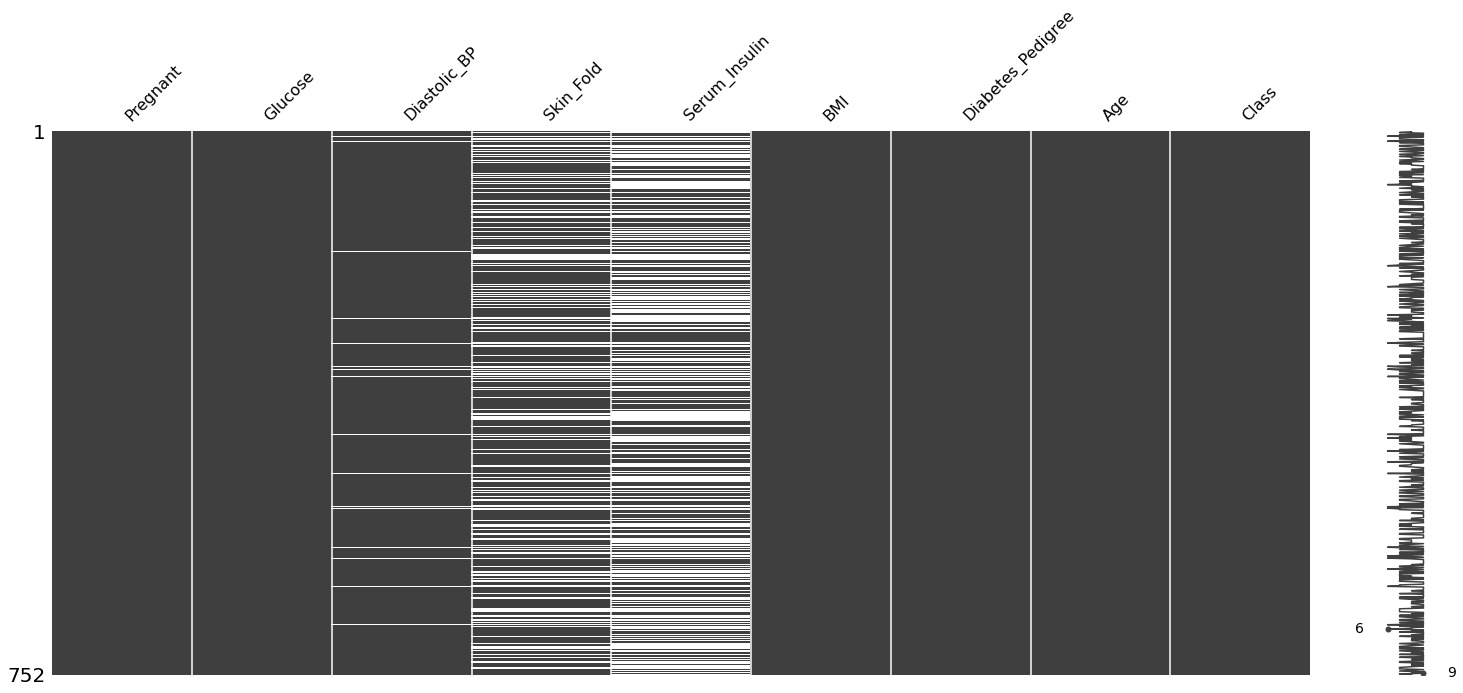

In [22]:
# Como Glucose y BMI tienen pocos valores faltantes, pueden eliminarse las filas completas:

print(diabetes["Glucose"].isnull().sum())
print(diabetes["BMI"].isnull().sum())

diabetes.dropna(subset = ["Glucose", "BMI"], how = "any", inplace = True)
msno.matrix(diabetes)

<AxesSubplot:>

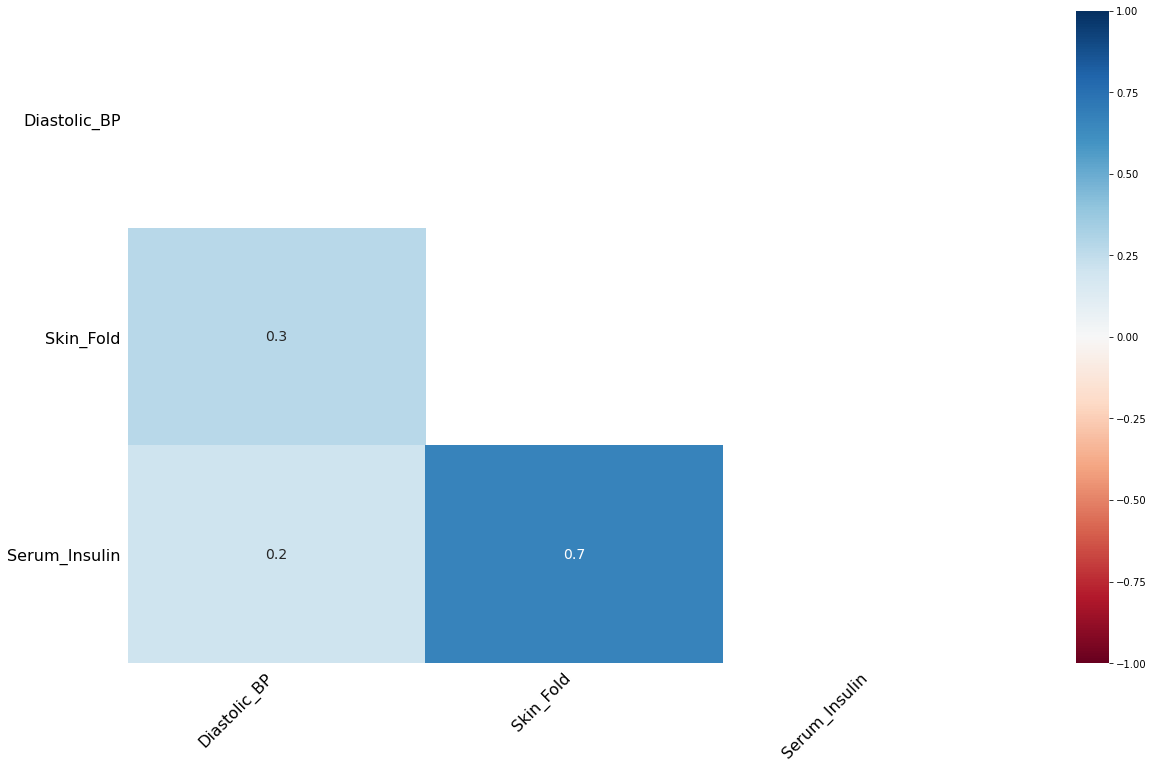

In [23]:
msno.heatmap(diabetes)

## TÉCNICAS DE IMPUTACIÓN

### Media, mediana y moda

Son las formas más fáciles de imputar.

In [24]:
diabetes = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/pima-indians-diabetes data.csv")

from sklearn.impute import SimpleImputer

# Creamos una copia del dataset original:

diabetes_mean_imputed = diabetes.copy(deep = True)

# Indicamos cómo imputaremos datos:

mean_imputer = SimpleImputer(strategy = "mean")

# Imputamos datos:

diabetes_mean_imputed.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean_imputed)

In [25]:
# Y para usar la mediana:

# Creamos una copia del dataset original:

diabetes_median = diabetes.copy(deep = True)

# Indicamos cómo imputaremos datos:

median_imputer = SimpleImputer(strategy = "median")

# Imputamos datos:

diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

In [26]:
# Y para usar la moda:

# Creamos una copia del dataset original:

diabetes_mode = diabetes.copy(deep = True)

# Indicamos cómo imputaremos datos:

mode_imputer = SimpleImputer(strategy = "most_frequent")

# Imputamos datos:

diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [27]:
# Y para usar una constante:

# Creamos una copia del dataset original:

diabetes_constant = diabetes.copy(deep = True)

# Indicamos cómo imputaremos datos:

constant_imputer = SimpleImputer(strategy = "constant", fill_value = 0)

# Imputamos datos:

diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


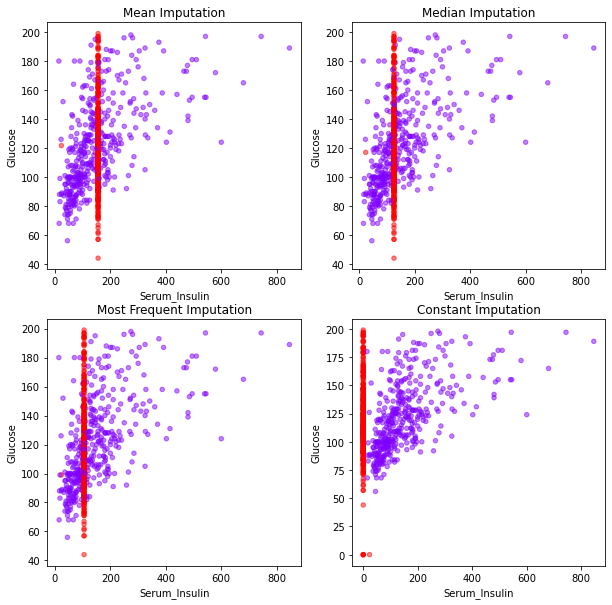

In [28]:
# Graficando:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

nullity = diabetes["Serum_Insulin"].isnull() + diabetes["Glucose"].isnull()

imputations = {"Mean Imputation": diabetes_mean_imputed,
              "Median Imputation": diabetes_median,
              "Most Frequent Imputation": diabetes_mode,
              "Constant Imputation": diabetes_constant}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = "Serum_Insulin", y = "Glucose", kind = "scatter", alpha = 0.5, c = nullity, cmap = "rainbow", ax = ax, colorbar = False,
                            title = df_key)

### Imputando series de tiempo

In [29]:
airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

print(airquality.isnull().sum())

print(airquality.isnull().mean()*100) # gran proporción de datos de Ozone faltantes

Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64
Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


Se usa el método .fillna() para imputar datos de este tipo. El argumento "method" puede ser "ffill", el cual reemplaza todos los NAs  con el último valor observado

In [30]:
print(airquality["Ozone"][30:40])

airquality.fillna(method = "ffill", inplace = True)

print(airquality["Ozone"][30:40])

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64
Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    37.0
1976-06-05    37.0
1976-06-06    37.0
1976-06-07    29.0
1976-06-08    29.0
1976-06-09    71.0
Name: Ozone, dtype: float64


In [31]:
airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

print(airquality["Ozone"][30:40])

airquality.fillna(method = "bfill", inplace = True)

print(airquality["Ozone"][30:40])

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64
Date
1976-05-31    37.0
1976-06-01    29.0
1976-06-02    29.0
1976-06-03    29.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    71.0
1976-06-09    71.0
Name: Ozone, dtype: float64


Otro método muy apropiado para la imputación de datos temporales es .interpolate(). Se puede usar como "linear", el cual imputa linealmente con valores equidistantes:

In [32]:
airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

print(airquality["Ozone"][30:40])

airquality.interpolate(method = "linear", inplace = True)

print(airquality["Ozone"][30:40])

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64
Date
1976-05-31    37.000000
1976-06-01    35.857143
1976-06-02    34.714286
1976-06-03    33.571429
1976-06-04    32.428571
1976-06-05    31.285714
1976-06-06    30.142857
1976-06-07    29.000000
1976-06-08    50.000000
1976-06-09    71.000000
Name: Ozone, dtype: float64


El método "quadratic" imputa una trayectora parabólica en dirección negativa

In [33]:
airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

print(airquality["Ozone"][30:40])

airquality.interpolate(method = "quadratic", inplace = True)

print(airquality["Ozone"][30:40])

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64
Date
1976-05-31    37.000000
1976-06-01   -38.361123
1976-06-02   -79.352735
1976-06-03   -85.974836
1976-06-04   -62.354606
1976-06-05   -33.255133
1976-06-06    -2.803598
1976-06-07    29.000000
1976-06-08    62.155660
1976-06-09    71.000000
Name: Ozone, dtype: float64


Finalmente, la imputación de "nearest values" es una combinación de "ffill" y "bfill"

In [34]:
airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

print(airquality["Ozone"][30:40])

airquality.interpolate(method = "nearest", inplace = True)

print(airquality["Ozone"][30:40])

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64
Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    29.0
1976-06-09    71.0
Name: Ozone, dtype: float64


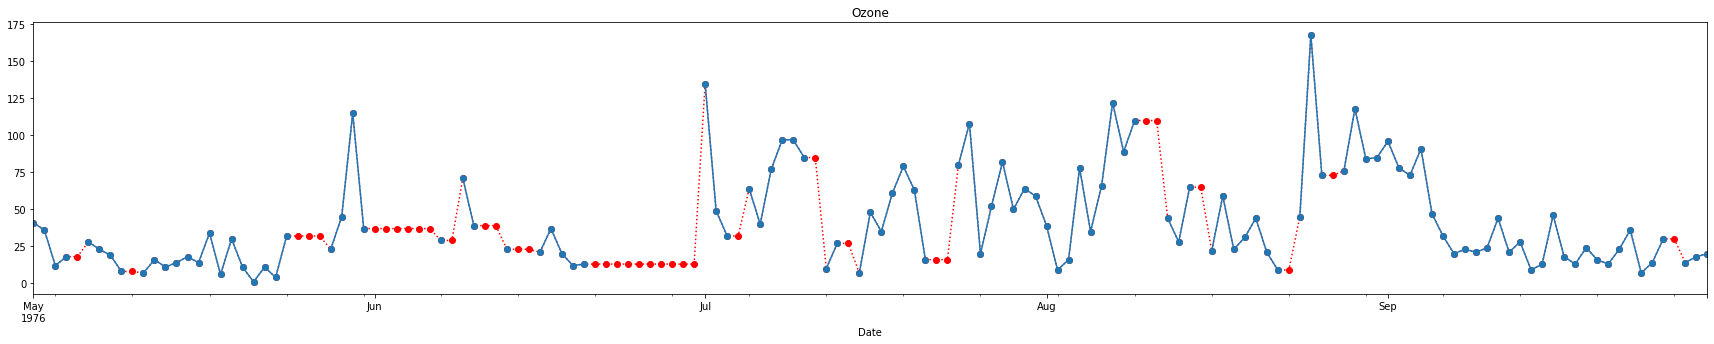

In [35]:
# Visualizando las imputaciones de series de tiempo:

### FORWARD FILL

airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.copy(deep=True)

ffill_imputed.fillna(method='ffill',inplace=True)

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

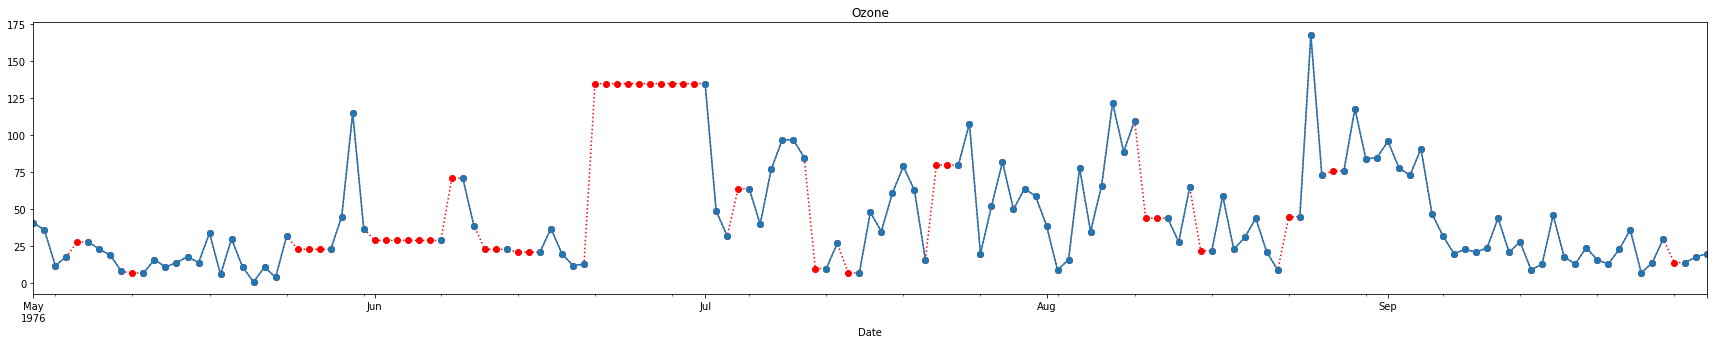

In [36]:
### BACKWARD FILL

airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.copy(deep=True)

bfill_imputed.fillna(method='bfill',inplace=True)

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()


<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

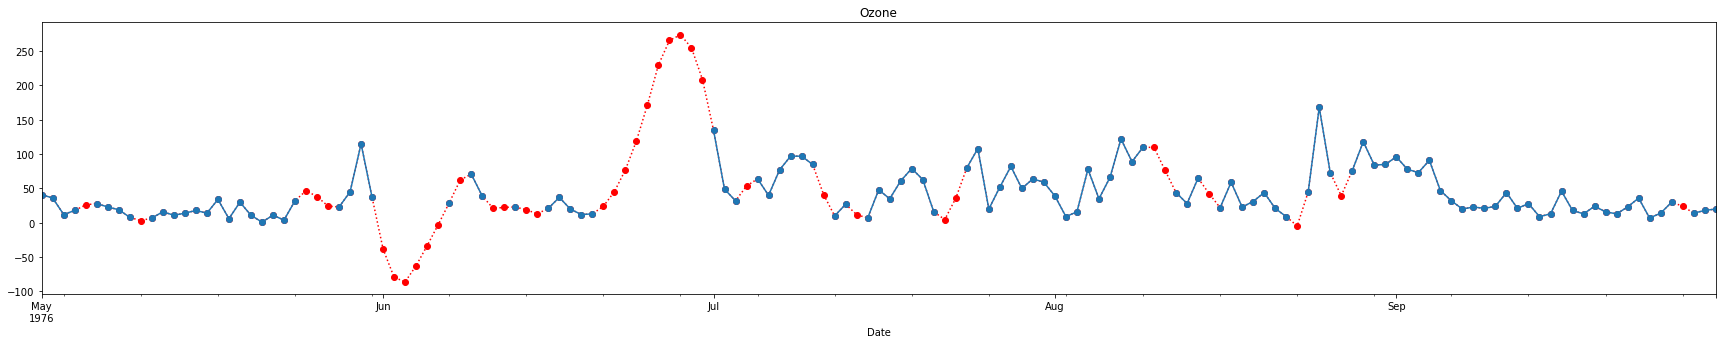

In [37]:
### QUADRATIC FILL

airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

# Impute airquality DataFrame with quadratic method
quadratic_imput=airquality.copy(deep=True)

quadratic_imput.interpolate(method='quadratic', inplace=True)

quadratic_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

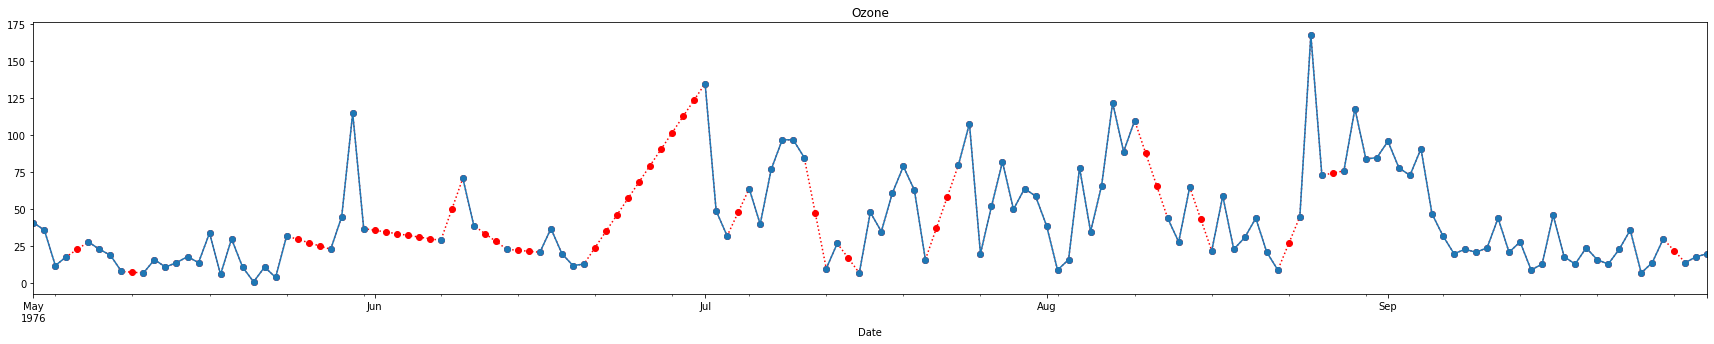

In [38]:
### LINEAR FILL

airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

# Impute airquality DataFrame with linear method
linear_imput=airquality.copy(deep=True)

linear_imput.interpolate(method='linear', inplace=True)

linear_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

<AxesSubplot:title={'center':'Ozone'}, xlabel='Date'>

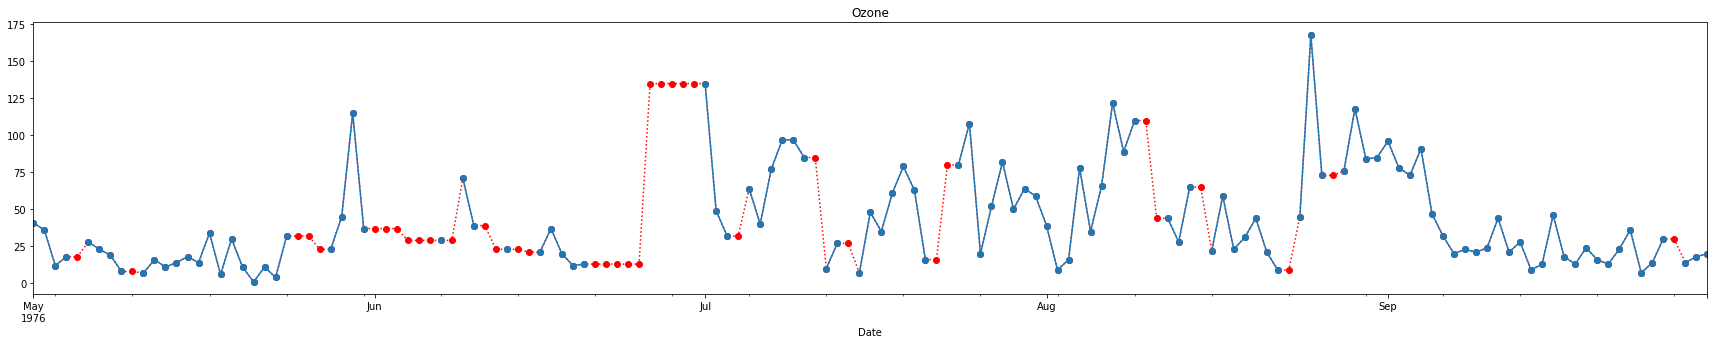

In [39]:
### LINEAR FILL

airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

# Impute airquality DataFrame with nearest method
nearest_imput=airquality.copy(deep=True)

nearest_imput.interpolate(method='nearest', inplace=True)

nearest_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

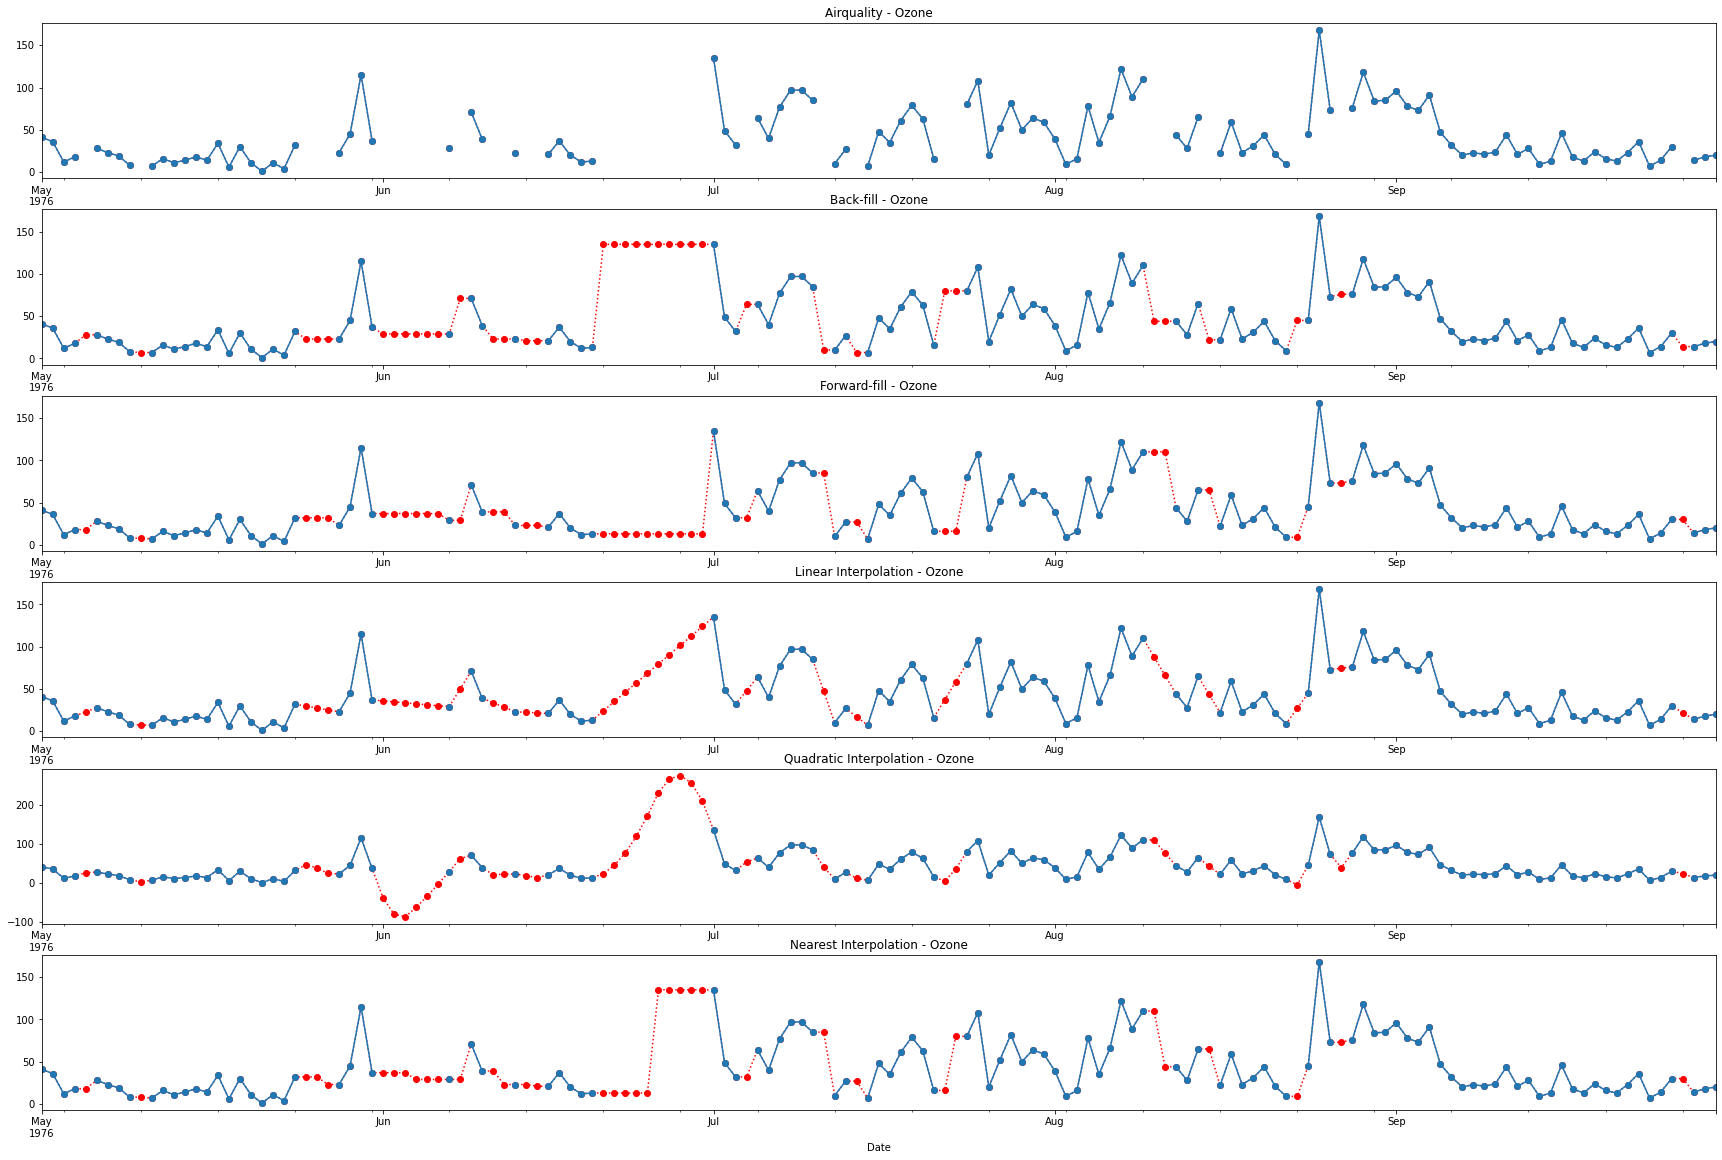

In [40]:
# TODOS JUNTOS:

airquality = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/air-quality.csv", parse_dates = ["Date"], index_col = "Date")

# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(6, 1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Airquality': airquality, 'Back-fill':bfill_imputed, 'Forward-fill':ffill_imputed,
                  'Linear Interpolation': linear_imput, 'Quadratic Interpolation': quadratic_imput, 
                  'Nearest Interpolation': nearest_imput}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
  interpolations[df_key].Ozone.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
  airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)
  
plt.show()

## TÉCNICAS AVANZADAS DE IMPUTACIÓN

fancyimpute contiene técnicas avanzadas de imputación. A continuación se revisarán las técnicas de kNN y de MICE (Multiple Imputation by Chained Equations)

### kNN y MICE

Imputing row 1/768 with 1 missing, elapsed time: 0.077
Imputing row 101/768 with 2 missing, elapsed time: 0.078
Imputing row 201/768 with 1 missing, elapsed time: 0.080
Imputing row 301/768 with 3 missing, elapsed time: 0.082
Imputing row 401/768 with 2 missing, elapsed time: 0.084
Imputing row 501/768 with 0 missing, elapsed time: 0.086
Imputing row 601/768 with 1 missing, elapsed time: 0.087
Imputing row 701/768 with 0 missing, elapsed time: 0.089


<AxesSubplot:title={'center':'Ozone'}>

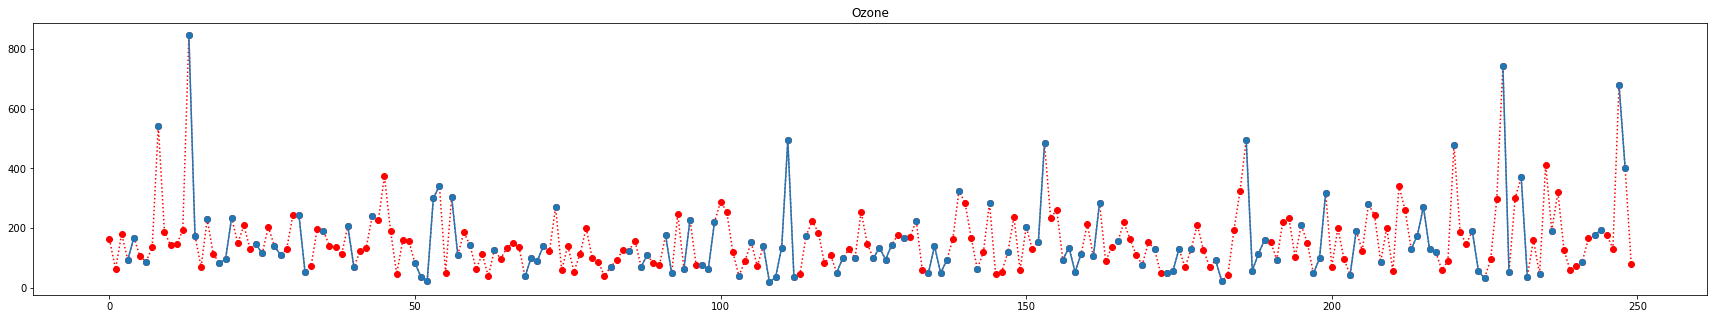

In [41]:
### kNN

diabetes = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/pima-indians-diabetes data.csv")

# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)


###

diabetes_knn_imputed['Serum_Insulin'][0:250].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

diabetes['Serum_Insulin'][0:250].plot(title='Ozone', marker='o', figsize=(30, 5))

<AxesSubplot:title={'center':'Ozone'}>

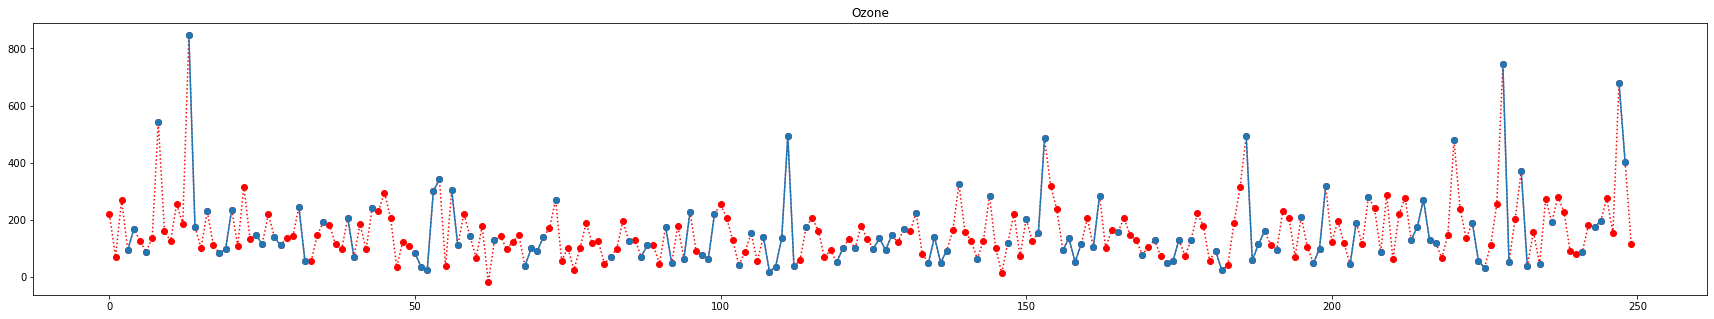

In [42]:
# MICE

diabetes = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/pima-indians-diabetes data.csv")

# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes)

###

diabetes_mice_imputed['Serum_Insulin'][0:250].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

diabetes['Serum_Insulin'][0:250].plot(title='Ozone', marker='o', figsize=(30, 5))

### Técnicas de evaluación

Los gráficos de densidad explican la distribución de los datos y son una buena métrica para evaluar el sesgo en las imputaciones. Para ello, se usa el paquete statsmodels.

In [43]:
import statsmodels.api as sm

# Primero construimos el caso completo, eliminando los valores faltantes. Este será el modelo base de comparación con otras imputaciones:

diabetes_cc = diabetes.dropna(how = "any")

X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc["Class"]
lm = sm.OLS(y, X).fit()

# Nos fijaremos en la R^2 y los coeficientes para evaluar el modelo:

print(lm.summary())

print(lm.rsquared_adj)

print(lm.params)

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           2.65e-31
Time:                        09:40:54   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1027      0.14

In [44]:
# Y se repite el proceso para las imputaciones:

# Mean
X = sm.add_constant(diabetes_mean_imputed.iloc[:, :-1])
y = diabetes["Class"]
lm_mean = sm.OLS(y, X).fit()
    
# kNN
X = sm.add_constant(diabetes_knn_imputed.iloc[:, :-1])
lm_KNN = sm.OLS(y, X).fit()

# MICE
X = sm.add_constant(diabetes_mice_imputed.iloc[:, :-1])
lm_MICE = sm.OLS(y, X).fit()


In [45]:
# Comparando las R:

print(pd.DataFrame({"Complete": lm.rsquared_adj,
                   "Mean Imp": lm_mean.rsquared_adj,
                   "kNN Imp": lm_KNN.rsquared_adj,
                   "MICE Imp": lm_MICE.rsquared_adj},
                  index = ["R_squared_adj"]))

               Complete  Mean Imp   kNN Imp  MICE Imp
R_squared_adj  0.332108  0.313781  0.316505  0.316534


In [46]:
# Comparando sus parámetros:

print(pd.DataFrame({"Complete": lm.params,
                   "Mean Imp": lm_mean.params,
                   "kNN Imp": lm_KNN.params,
                   "MICE Imp": lm_MICE.params}))

                   Complete  Mean Imp   kNN Imp  MICE Imp
const             -1.102677 -1.024005 -1.027586 -1.035018
Pregnant           0.012953  0.020693  0.020074  0.020380
Glucose            0.006409  0.006467  0.006593  0.006638
Diastolic_BP       0.000055 -0.001137 -0.001191 -0.001220
Skin_Fold          0.001678  0.000193  0.001744  0.000569
Serum_Insulin     -0.000123 -0.000090 -0.000129 -0.000116
BMI                0.009325  0.014376  0.013103  0.014147
Diabetes_Pedigree  0.157192  0.129282  0.127763  0.127947
Age                0.005878  0.002092  0.002036  0.002051


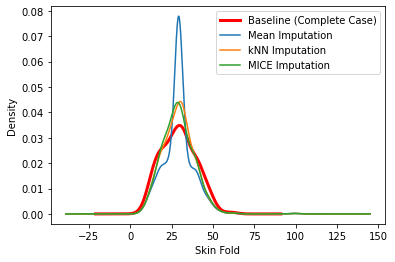

In [47]:
# Comparando gráficos de densidad:

diabetes_cc["Skin_Fold"].plot(kind = "kde", c = "red", linewidth = 3)
diabetes_mean_imputed["Skin_Fold"].plot(kind = "kde")
diabetes_knn_imputed["Skin_Fold"].plot(kind = "kde")
diabetes_mice_imputed["Skin_Fold"].plot(kind = "kde")

labels = ["Baseline (Complete Case)", "Mean Imputation", "kNN Imputation", "MICE Imputation"]

plt.legend(labels)

plt.xlabel("Skin Fold")

plt.show()

# TRABAJANDO CON FECHAS Y TIEMPO

## FECHAS Y CALENDARIOS

In [48]:
from datetime import date

two_hurricanes_dates = [date(2016, 10, 7), date(2017, 6, 21)]

print(two_hurricanes_dates[0].year)
print(two_hurricanes_dates[0].month)
print(two_hurricanes_dates[0].day)

# El método weekday() arroja el número del día de la semana de una fecha (0 es lunes):

print(two_hurricanes_dates[0].weekday())

2016
10
7
4


In [49]:
import pickle

with open('C:/Users/marco/Data Camp Python/Datasets/florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)
    
print(florida_hurricane_dates)
    
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

[datetime.date(1988, 8, 4), datetime.date(1990, 10, 12), datetime.date(2003, 4, 20), datetime.date(1971, 9, 1), datetime.date(1988, 8, 23), datetime.date(1994, 8, 15), datetime.date(2002, 8, 4), datetime.date(1988, 5, 30), datetime.date(2003, 9, 13), datetime.date(2009, 8, 21), datetime.date(1978, 6, 22), datetime.date(1969, 6, 9), datetime.date(1976, 6, 11), datetime.date(1976, 8, 19), datetime.date(1966, 6, 9), datetime.date(1968, 7, 5), datetime.date(1987, 11, 4), datetime.date(1988, 8, 13), datetime.date(2007, 12, 13), datetime.date(1994, 11, 16), datetime.date(2003, 9, 6), datetime.date(1971, 8, 13), datetime.date(1981, 8, 17), datetime.date(1998, 9, 25), datetime.date(1968, 9, 26), datetime.date(1968, 6, 4), datetime.date(1998, 11, 5), datetime.date(2008, 8, 18), datetime.date(1987, 8, 14), datetime.date(1988, 11, 23), datetime.date(2010, 9, 29), datetime.date(1985, 7, 23), datetime.date(2017, 7, 31), datetime.date(1955, 8, 21), datetime.date(1986, 6, 26), datetime.date(1963, 10,

### Matemáticas con fechas

In [50]:
d1 = date(2017, 11, 5)
d2 = date(2017, 12, 4)

l = [d1, d2]

print(min(l))

# Diferencia:

delta = d2 - d1

print(delta.days)

# Alternativamente:

from datetime import timedelta

td = timedelta(days = 29)

print(d1 + td)

2017-11-05
29
2017-12-04


In [51]:
# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


In [52]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0, 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] = hurricanes_each_month[month] + 1
  
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


### Fechas a cadenas

In [53]:
d = date(2017, 11, 5)

# Tiene el formato YYYY-MM-DD (ISO 8601):

print(d)

# Para expresar esa fecha en ISO 8601 y ponerla en una lista:

print([d.isoformat()])

2017-11-05
['2017-11-05']


In [54]:
# Las fechas en este formato se ordenan automáticamente:

some_dates = ["2000-01-01", "1999-12-31"]

# print(sorted(some_dates))

# Esto también aplica para nombres de archivos, los cuales podrían ordenarse fácilmente con este formato.

In [55]:
# Para representar fehcas en otros formatos, usamos strftime()

d = date(2017, 1, 5)

print(d.strftime("%Y"))

print(d.strftime("%Y/%m/%d"))

2017
2017/01/05


In [56]:
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


In [57]:
# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime("%Y-%m"))

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime("%B (%Y)"))

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime("%Y-%j"))

1992-08
August (1992)
1992-239


## COMBINANDO FECHAS Y TIEMPOS

In [58]:
from datetime import datetime

dt = datetime(2017, 10, 1, 15, 23, 25, 500000) # año, mes, día, hora, minuto, segundo, microsegundo

print(dt)

dt_hr = dt.replace(minute = 0, second = 0, microsecond = 0)

print(dt_hr)

2017-10-01 15:23:25.500000
2017-10-01 15:00:00


In [59]:
bike_share = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/capital-onebike.csv")

bike_share["Start date"] = pd.to_datetime(bike_share["Start date"])
bike_share["End date"] = pd.to_datetime(bike_share["End date"])

In [60]:
dt = datetime(2017, 12, 30, 15, 19, 13)

print(dt.strftime("%Y-%m-%d"))

print(dt.strftime("%Y-%m-%d %H:%M:%S"))

print(dt.isoformat())

2017-12-30
2017-12-30 15:19:13
2017-12-30T15:19:13


In [61]:
# Para convertir fechas en strings:

dt = datetime.strptime("12/30/2017 15:19:13", "%m/%d/%Y %H:%M:%S")

print(type(dt))

print(dt)

# Es necesario que el match de la cadena original y el nuevo formato sea exacto, si no, arrojará un error

<class 'datetime.datetime'>
2017-12-30 15:19:13


### Formato Unix

In [62]:
ts = 1514665123.0

print(datetime.fromtimestamp(ts))

2017-12-30 14:18:43


In [63]:
# Ejemplo

onebike_datetime_strings = [('2017-10-01 15:23:25', '2017-10-01 15:26:26'), ('2017-10-01 15:42:57', '2017-10-01 17:49:59'), ('2017-10-02 06:37:10', '2017-10-02 06:42:53'), ('2017-10-02 08:56:45', '2017-10-02 09:18:03'), ('2017-10-02 18:23:48', '2017-10-02 18:45:05'), ('2017-10-02 18:48:08', '2017-10-02 19:10:54'), ('2017-10-02 19:18:10', '2017-10-02 19:31:45'), ('2017-10-02 19:37:32', '2017-10-02 19:46:37'), ('2017-10-03 08:24:16', '2017-10-03 08:32:27'), ('2017-10-03 18:17:07', '2017-10-03 18:27:46'), ('2017-10-03 19:24:10', '2017-10-03 19:52:08'), ('2017-10-03 20:17:06', '2017-10-03 20:23:52'), ('2017-10-03 20:45:21', '2017-10-03 20:57:10'), ('2017-10-04 07:04:57', '2017-10-04 07:13:31'), ('2017-10-04 07:13:42', '2017-10-04 07:21:54'), ('2017-10-04 14:22:12', '2017-10-04 14:50:00'), ('2017-10-04 15:07:27', '2017-10-04 15:44:49'), ('2017-10-04 15:46:41', '2017-10-04 16:32:33'), ('2017-10-04 16:34:44', '2017-10-04 16:46:59'), ('2017-10-04 17:26:06', '2017-10-04 17:31:36'), ('2017-10-04 17:42:03', '2017-10-04 17:50:41'), ('2017-10-05 07:49:02', '2017-10-05 08:12:55'), ('2017-10-05 08:26:21', '2017-10-05 08:29:45'), ('2017-10-05 08:33:27', '2017-10-05 08:38:31'), ('2017-10-05 16:35:35', '2017-10-05 16:51:52'), ('2017-10-05 17:53:31', '2017-10-05 18:16:50'), ('2017-10-06 08:17:17', '2017-10-06 08:38:01'), ('2017-10-06 11:39:40', '2017-10-06 11:50:38'), ('2017-10-06 12:59:54', '2017-10-06 13:13:14'), ('2017-10-06 13:43:05', '2017-10-06 14:14:56'), ('2017-10-06 14:28:15', '2017-10-06 15:09:26'), ('2017-10-06 15:50:10', '2017-10-06 16:12:34'), ('2017-10-06 16:32:16', '2017-10-06 16:39:31'), ('2017-10-06 16:44:08', '2017-10-06 16:48:39'), ('2017-10-06 16:53:43', '2017-10-06 17:09:03'), ('2017-10-07 11:38:55', '2017-10-07 11:53:06'), ('2017-10-07 14:03:36', '2017-10-07 14:07:05'), ('2017-10-07 14:20:03', '2017-10-07 14:27:36'), ('2017-10-07 14:30:50', '2017-10-07 14:44:51'), ('2017-10-08 00:28:26', '2017-10-08 00:30:48'), ('2017-10-08 11:16:21', '2017-10-08 11:33:24'), ('2017-10-08 12:37:03', '2017-10-08 13:01:29'), ('2017-10-08 13:30:37', '2017-10-08 13:57:53'), ('2017-10-08 14:16:40', '2017-10-08 15:07:19'), ('2017-10-08 15:23:50', '2017-10-08 15:50:01'), ('2017-10-08 15:54:12', '2017-10-08 16:17:42'), ('2017-10-08 16:28:52', '2017-10-08 16:35:18'), ('2017-10-08 23:08:14', '2017-10-08 23:33:41'), ('2017-10-08 23:34:49', '2017-10-08 23:45:11'), ('2017-10-08 23:46:47', '2017-10-09 00:10:57'), ('2017-10-09 00:12:58', '2017-10-09 00:36:40'), ('2017-10-09 00:37:02', '2017-10-09 00:53:33'), ('2017-10-09 01:23:29', '2017-10-09 01:48:13'), ('2017-10-09 01:49:25', '2017-10-09 02:13:35'), ('2017-10-09 02:14:11', '2017-10-09 02:29:40'), ('2017-10-09 13:04:32', '2017-10-09 13:13:25'), ('2017-10-09 14:30:10', '2017-10-09 14:38:55'), ('2017-10-09 15:06:47', '2017-10-09 15:11:30'), ('2017-10-09 16:43:25', '2017-10-09 16:45:38'), ('2017-10-10 15:32:58', '2017-10-10 15:51:24'), ('2017-10-10 16:47:55', '2017-10-10 17:03:47'), ('2017-10-10 17:51:05', '2017-10-10 18:00:18'), ('2017-10-10 18:08:12', '2017-10-10 18:19:11'), ('2017-10-10 19:09:35', '2017-10-10 19:14:32'), ('2017-10-10 19:17:11', '2017-10-10 19:23:08'), ('2017-10-10 19:28:11', '2017-10-10 19:44:40'), ('2017-10-10 19:55:35', '2017-10-10 20:11:54'), ('2017-10-10 22:20:43', '2017-10-10 22:33:23'), ('2017-10-11 04:40:52', '2017-10-11 04:59:22'), ('2017-10-11 06:28:58', '2017-10-11 06:40:13'), ('2017-10-11 16:41:07', '2017-10-11 17:01:14'), ('2017-10-12 08:08:30', '2017-10-12 08:35:03'), ('2017-10-12 08:47:02', '2017-10-12 08:59:50'), ('2017-10-12 13:13:39', '2017-10-12 13:37:45'), ('2017-10-12 13:40:12', '2017-10-12 13:48:17'), ('2017-10-12 13:49:56', '2017-10-12 13:53:16'), ('2017-10-12 14:33:18', '2017-10-12 14:39:57'), ('2017-10-13 15:55:39', '2017-10-13 15:59:41'), ('2017-10-17 17:58:48', '2017-10-17 18:01:38'), ('2017-10-19 20:21:45', '2017-10-19 20:29:15'), ('2017-10-19 21:11:39', '2017-10-19 21:29:37'), ('2017-10-19 21:30:01', '2017-10-19 21:47:23'), ('2017-10-19 21:47:34', '2017-10-19 21:57:07'), ('2017-10-19 21:57:24', '2017-10-19 22:09:52'), ('2017-10-21 12:24:09', '2017-10-21 12:36:24'), ('2017-10-21 12:36:37', '2017-10-21 12:42:13'), ('2017-10-21 13:47:43', '2017-10-22 11:09:36'), ('2017-10-22 13:28:53', '2017-10-22 13:31:44'), ('2017-10-22 13:47:05', '2017-10-22 13:56:33'), ('2017-10-22 14:26:41', '2017-10-22 14:32:39'), ('2017-10-22 14:54:41', '2017-10-22 15:09:58'), ('2017-10-22 16:40:29', '2017-10-22 16:51:40'), ('2017-10-22 17:58:46', '2017-10-22 18:28:37'), ('2017-10-22 18:45:16', '2017-10-22 18:50:34'), ('2017-10-22 18:56:22', '2017-10-22 19:11:10'), ('2017-10-23 10:14:08', '2017-10-23 10:35:32'), ('2017-10-23 11:29:36', '2017-10-23 14:38:34'), ('2017-10-23 15:04:52', '2017-10-23 15:32:58'), ('2017-10-23 15:33:48', '2017-10-23 17:06:47'), ('2017-10-23 17:13:16', '2017-10-23 19:31:26'), ('2017-10-23 19:55:03', '2017-10-23 20:25:53'), ('2017-10-23 21:47:54', '2017-10-23 22:18:04'), ('2017-10-23 22:34:12', '2017-10-23 22:48:42'), ('2017-10-24 06:55:01', '2017-10-24 07:02:17'), ('2017-10-24 14:56:07', '2017-10-24 15:03:16'), ('2017-10-24 15:51:36', '2017-10-24 15:59:50'), ('2017-10-24 16:31:10', '2017-10-24 16:55:09'), ('2017-10-28 14:26:14', '2017-10-28 14:32:34'), ('2017-11-01 09:41:54', '2017-11-01 09:52:23'), ('2017-11-01 20:16:11', '2017-11-01 20:32:13'), ('2017-11-02 19:44:29', '2017-11-02 19:50:56'), ('2017-11-02 20:14:37', '2017-11-02 20:30:29'), ('2017-11-02 21:35:47', '2017-11-02 21:38:57'), ('2017-11-03 09:59:27', '2017-11-03 10:11:46'), ('2017-11-03 10:13:22', '2017-11-03 10:32:02'), ('2017-11-03 10:44:25', '2017-11-03 10:50:34'), ('2017-11-03 16:06:43', '2017-11-03 16:44:38'), ('2017-11-03 16:45:54', '2017-11-03 17:00:27'), ('2017-11-03 17:07:15', '2017-11-03 17:35:05'), ('2017-11-03 17:36:05', '2017-11-03 17:46:48'), ('2017-11-03 17:50:31', '2017-11-03 18:00:03'), ('2017-11-03 19:22:56', '2017-11-03 19:45:51'), ('2017-11-04 13:14:10', '2017-11-04 13:26:15'), ('2017-11-04 14:18:37', '2017-11-04 14:30:05'), ('2017-11-04 14:45:59', '2017-11-04 15:03:20'), ('2017-11-04 15:16:03', '2017-11-04 15:44:30'), ('2017-11-04 16:37:46', '2017-11-04 16:58:22'), ('2017-11-04 17:13:19', '2017-11-04 17:34:50'), ('2017-11-04 18:10:34', '2017-11-04 18:58:44'), ('2017-11-05 01:56:50', '2017-11-05 01:01:04'), ('2017-11-05 08:33:33', '2017-11-05 08:53:46'), ('2017-11-05 08:58:08', '2017-11-05 09:03:39'), ('2017-11-05 11:05:08', '2017-11-05 11:30:05'), ('2017-11-06 08:50:18', '2017-11-06 08:59:05'), ('2017-11-06 09:04:03', '2017-11-06 09:13:47'), ('2017-11-06 16:19:36', '2017-11-06 17:02:55'), ('2017-11-06 17:21:27', '2017-11-06 17:34:06'), ('2017-11-06 17:36:01', '2017-11-06 17:57:32'), ('2017-11-06 17:59:52', '2017-11-06 18:15:08'), ('2017-11-06 18:18:36', '2017-11-06 18:21:17'), ('2017-11-06 19:24:31', '2017-11-06 19:37:57'), ('2017-11-06 19:49:16', '2017-11-06 20:03:14'), ('2017-11-07 07:50:48', '2017-11-07 08:01:32'), ('2017-11-08 13:11:51', '2017-11-08 13:18:05'), ('2017-11-08 21:34:47', '2017-11-08 21:46:05'), ('2017-11-08 22:02:30', '2017-11-08 22:04:47'), ('2017-11-09 07:01:11', '2017-11-09 07:12:10'), ('2017-11-09 08:02:02', '2017-11-09 08:08:28'), ('2017-11-09 08:19:59', '2017-11-09 08:32:24'), ('2017-11-09 08:41:31', '2017-11-09 08:48:59'), ('2017-11-09 09:00:06', '2017-11-09 09:09:24'), ('2017-11-09 09:09:37', '2017-11-09 09:24:25'), ('2017-11-09 13:14:37', '2017-11-09 13:25:39'), ('2017-11-09 15:20:07', '2017-11-09 15:31:10'), ('2017-11-09 18:47:08', '2017-11-09 18:53:10'), ('2017-11-09 23:35:02', '2017-11-09 23:43:35'), ('2017-11-10 07:51:33', '2017-11-10 08:02:28'), ('2017-11-10 08:38:28', '2017-11-10 08:42:09'), ('2017-11-11 18:05:25', '2017-11-11 18:13:14'), ('2017-11-11 19:39:12', '2017-11-11 19:46:22'), ('2017-11-11 21:13:19', '2017-11-11 21:16:31'), ('2017-11-12 09:46:19', '2017-11-12 09:51:43'), ('2017-11-13 13:33:42', '2017-11-13 13:54:15'), ('2017-11-14 08:40:29', '2017-11-14 08:55:52'), ('2017-11-15 06:14:05', '2017-11-15 06:30:06'), ('2017-11-15 08:14:59', '2017-11-15 08:23:44'), ('2017-11-15 10:16:44', '2017-11-15 10:33:41'), ('2017-11-15 10:33:58', '2017-11-15 10:54:14'), ('2017-11-15 11:02:15', '2017-11-15 11:14:42'), ('2017-11-16 09:27:41', '2017-11-16 09:38:49'), ('2017-11-16 09:57:41', '2017-11-16 10:18:00'), ('2017-11-16 17:25:05', '2017-11-16 17:44:47'), ('2017-11-17 13:45:54', '2017-11-17 16:36:56'), ('2017-11-17 19:12:49', '2017-11-17 19:31:15'), ('2017-11-18 10:49:06', '2017-11-18 10:55:45'), ('2017-11-18 11:32:12', '2017-11-18 11:44:16'), ('2017-11-18 18:09:01', '2017-11-18 18:14:31'), ('2017-11-18 18:53:10', '2017-11-18 19:01:29'), ('2017-11-19 14:15:41', '2017-11-19 14:31:49'), ('2017-11-20 21:19:19', '2017-11-20 21:41:09'), ('2017-11-20 22:39:48', '2017-11-20 23:23:37'), ('2017-11-21 17:44:25', '2017-11-21 17:51:32'), ('2017-11-21 18:20:52', '2017-11-21 18:34:51'), ('2017-11-21 18:47:32', '2017-11-21 18:51:50'), ('2017-11-21 19:07:57', '2017-11-21 19:14:33'), ('2017-11-21 20:04:56', '2017-11-21 20:08:54'), ('2017-11-21 21:55:47', '2017-11-21 22:08:12'), ('2017-11-23 23:47:43', '2017-11-23 23:57:56'), ('2017-11-24 06:41:25', '2017-11-24 06:53:15'), ('2017-11-24 06:58:56', '2017-11-24 07:33:24'), ('2017-11-26 12:25:49', '2017-11-26 12:41:36'), ('2017-11-27 05:29:04', '2017-11-27 05:54:13'), ('2017-11-27 06:06:47', '2017-11-27 06:11:01'), ('2017-11-27 06:45:14', '2017-11-27 06:55:39'), ('2017-11-27 09:39:44', '2017-11-27 09:47:43'), ('2017-11-27 11:09:18', '2017-11-27 11:20:46'), ('2017-11-27 11:31:46', '2017-11-27 11:35:44'), ('2017-11-27 12:07:14', '2017-11-27 12:12:36'), ('2017-11-27 12:21:40', '2017-11-27 12:26:44'), ('2017-11-27 17:26:31', '2017-11-27 17:36:07'), ('2017-11-27 18:11:49', '2017-11-27 18:29:04'), ('2017-11-27 19:36:16', '2017-11-27 19:47:17'), ('2017-11-27 20:12:57', '2017-11-27 20:17:33'), ('2017-11-28 08:18:06', '2017-11-28 08:41:53'), ('2017-11-28 19:17:23', '2017-11-28 19:34:01'), ('2017-11-28 19:34:15', '2017-11-28 19:46:24'), ('2017-11-28 21:27:29', '2017-11-28 21:39:32'), ('2017-11-29 07:47:38', '2017-11-29 07:51:18'), ('2017-11-29 09:50:12', '2017-11-29 09:53:44'), ('2017-11-29 17:03:42', '2017-11-29 17:16:21'), ('2017-11-29 18:19:15', '2017-11-29 18:23:43'), ('2017-12-01 17:03:58', '2017-12-01 17:10:12'), ('2017-12-02 07:55:56', '2017-12-02 08:01:01'), ('2017-12-02 09:16:14', '2017-12-02 09:21:18'), ('2017-12-02 19:48:29', '2017-12-02 19:53:18'), ('2017-12-03 14:36:29', '2017-12-03 15:20:09'), ('2017-12-03 16:04:02', '2017-12-03 16:25:30'), ('2017-12-03 16:40:26', '2017-12-03 16:43:58'), ('2017-12-03 17:20:17', '2017-12-03 18:04:33'), ('2017-12-04 08:34:24', '2017-12-04 08:51:00'), ('2017-12-04 17:49:26', '2017-12-04 17:53:57'), ('2017-12-04 18:38:52', '2017-12-04 18:50:33'), ('2017-12-04 21:39:20', '2017-12-04 21:46:58'), ('2017-12-04 21:54:21', '2017-12-04 21:56:17'), ('2017-12-05 08:50:50', '2017-12-05 08:52:54'), ('2017-12-06 08:19:38', '2017-12-06 08:24:14'), ('2017-12-06 18:19:19', '2017-12-06 18:28:11'), ('2017-12-06 18:28:55', '2017-12-06 18:33:12'), ('2017-12-06 20:03:29', '2017-12-06 20:21:38'), ('2017-12-06 20:36:42', '2017-12-06 20:39:57'), ('2017-12-07 05:54:51', '2017-12-07 06:01:15'), ('2017-12-08 16:47:18', '2017-12-08 16:55:49'), ('2017-12-08 19:15:02', '2017-12-08 19:29:12'), ('2017-12-09 22:39:37', '2017-12-09 22:47:19'), ('2017-12-09 23:00:10', '2017-12-09 23:05:32'), ('2017-12-10 00:39:24', '2017-12-10 00:56:02'), ('2017-12-10 01:02:42', '2017-12-10 01:08:09'), ('2017-12-10 01:08:57', '2017-12-10 01:11:30'), ('2017-12-10 13:49:09', '2017-12-10 13:51:41'), ('2017-12-10 15:14:29', '2017-12-10 15:18:19'), ('2017-12-10 15:31:07', '2017-12-10 15:36:28'), ('2017-12-10 16:20:06', '2017-12-10 16:30:31'), ('2017-12-10 17:07:54', '2017-12-10 17:14:25'), ('2017-12-10 17:23:47', '2017-12-10 17:45:25'), ('2017-12-11 06:17:06', '2017-12-11 06:34:04'), ('2017-12-11 09:08:41', '2017-12-11 09:12:21'), ('2017-12-11 09:15:41', '2017-12-11 09:20:18'), ('2017-12-12 08:55:53', '2017-12-12 08:59:34'), ('2017-12-13 17:14:56', '2017-12-13 17:18:32'), ('2017-12-13 18:52:16', '2017-12-13 19:00:45'), ('2017-12-14 09:01:10', '2017-12-14 09:11:06'), ('2017-12-14 09:12:59', '2017-12-14 09:19:06'), ('2017-12-14 11:54:33', '2017-12-14 12:02:00'), ('2017-12-14 14:40:23', '2017-12-14 14:44:40'), ('2017-12-14 15:08:55', '2017-12-14 15:26:24'), ('2017-12-14 17:46:17', '2017-12-14 18:09:04'), ('2017-12-15 09:08:12', '2017-12-15 09:23:45'), ('2017-12-16 09:33:46', '2017-12-16 09:36:17'), ('2017-12-16 11:02:31', '2017-12-16 11:05:04'), ('2017-12-17 10:09:47', '2017-12-17 10:32:03'), ('2017-12-18 08:02:36', '2017-12-18 08:07:34'), ('2017-12-18 16:03:00', '2017-12-18 16:09:20'), ('2017-12-18 16:30:07', '2017-12-18 16:53:12'), ('2017-12-18 19:18:23', '2017-12-18 19:22:08'), ('2017-12-18 20:14:46', '2017-12-18 20:17:47'), ('2017-12-19 19:14:08', '2017-12-19 19:23:49'), ('2017-12-19 19:39:36', '2017-12-19 19:43:46'), ('2017-12-20 08:05:14', '2017-12-20 08:10:46'), ('2017-12-20 08:15:45', '2017-12-20 08:29:50'), ('2017-12-20 08:33:32', '2017-12-20 08:38:09'), ('2017-12-20 13:43:36', '2017-12-20 13:54:39'), ('2017-12-20 18:57:53', '2017-12-20 19:06:54'), ('2017-12-21 07:21:11', '2017-12-21 07:32:03'), ('2017-12-21 08:01:58', '2017-12-21 08:06:15'), ('2017-12-21 13:20:54', '2017-12-21 13:33:49'), ('2017-12-21 15:26:08', '2017-12-21 15:34:27'), ('2017-12-21 18:09:46', '2017-12-21 18:38:50'), ('2017-12-22 16:14:21', '2017-12-22 16:21:46'), ('2017-12-22 16:29:17', '2017-12-22 16:34:14'), ('2017-12-25 12:49:51', '2017-12-25 13:18:27'), ('2017-12-25 13:46:44', '2017-12-25 14:20:50'), ('2017-12-26 10:40:16', '2017-12-26 10:53:45'), ('2017-12-27 16:56:12', '2017-12-27 17:17:39'), ('2017-12-29 06:02:34', '2017-12-29 06:12:30'), ('2017-12-29 12:21:03', '2017-12-29 12:46:16'), ('2017-12-29 14:32:55', '2017-12-29 14:43:46'), ('2017-12-29 15:08:26', '2017-12-29 15:18:51'), ('2017-12-29 20:33:34', '2017-12-29 20:38:13'), ('2017-12-30 13:51:03', '2017-12-30 13:54:33'), ('2017-12-30 15:09:03', '2017-12-30 15:19:13')]


# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)
    

In [64]:
# Import datetime
from datetime import datetime

# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


In [65]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 14, 19, 13), datetime.datetime(2017, 12, 30, 14, 9, 3)]


### Duraciones

In [66]:
start = datetime(2017, 10, 8, 23, 46, 47)

end = datetime(2017, 10, 9, 0, 10, 57)

duration = end - start

print(duration.total_seconds())

1450.0


In [67]:
from datetime import timedelta

delta1 = timedelta(seconds = 1)

print(start)

print(start + delta1)

###

delta2 = timedelta(days = 1, seconds = 1)

print(start + delta2)

###

delta3 = timedelta(weeks = -1)

print(start + delta3)

2017-10-08 23:46:47
2017-10-08 23:46:48
2017-10-09 23:46:48
2017-10-01 23:46:47


In [68]:
# Ejemplo

# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip["end"] - trip["start"]
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)
    
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time/ number_of_trips)

1178.9310344827586


In [69]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


## ZONAS HORARIAS

In [70]:
from datetime import datetime, timedelta, timezone

# Zona horaria US Eastern Standard:

ET = timezone(timedelta(hours = -5))

dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo = ET)

print(dt)

2017-12-30 15:09:03-05:00


In [71]:
# Zona horaria India Standard:

IST = timezone(timedelta(hours = 5, minutes = 30))

print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


In [72]:
# Se puede configurar el tzinfo directamente:

print(dt.replace(tzinfo = timezone.utc))

# O mediante astimezone:

print(dt.astimezone(timezone.utc))

2017-12-30 15:09:03+00:00
2017-12-30 20:09:03+00:00


In [73]:
# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00
2017-10-01T15:26:26-08:00


In [74]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo = edt)
  trip['end'] = trip['end'].replace(tzinfo = edt)

In [75]:
# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt = trip['start']
  # Move dt to be in UTC
  dt = dt.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


### Dataset de zonas horarias

In [76]:
from dateutil import tz

et = tz.gettz("America/New_York")

last = datetime(2017, 12, 30, 15, 9, 3, tzinfo = et)

print(last)

first = datetime(2017, 10, 1, 15, 23, 25, tzinfo = et)

print(first)

2017-12-30 15:09:03-05:00
2017-10-01 15:23:25-04:00


In [77]:
# Ejemplo

# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo = et)
  trip['end'] = trip['end'].replace(tzinfo = et)

###

# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


### Horario de verano

In [78]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


In [79]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


In [80]:
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(timezone.utc)
  end = trip['end'].astimezone(timezone.utc)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: -3346.0


## PANDAS, FECHAS Y TIEMPO

In [81]:
import pandas as pd

rides = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/capital-onebike.csv")

print(rides.head(3))

print(rides.info())

            Start date             End date  Start station number  \
0  2017-10-01 15:23:25  2017-10-01 15:26:26                 31038   
1  2017-10-01 15:42:57  2017-10-01 17:49:59                 31036   
2  2017-10-02 06:37:10  2017-10-02 06:42:53                 31036   

                   Start station  End station number  \
0           Glebe Rd & 11th St N               31036   
1  George Mason Dr & Wilson Blvd               31036   
2  George Mason Dr & Wilson Blvd               31037   

                            End station Bike number Member type  
0         George Mason Dr & Wilson Blvd      W20529      Member  
1         George Mason Dr & Wilson Blvd      W20529      Casual  
2  Ballston Metro / N Stuart & 9th St N      W20529      Member  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290

In [82]:
# Primero, hay que convertir las fechas al tipo de objeto adecuado:

rides = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/capital-onebike.csv", parse_dates = ["Start date", "End date"])

print(rides.info())

# Alternativamente de manera manual:

rides["Start date"] = pd.to_datetime(rides["Start date"], format = "%Y-%m-%d %H:%M:%S")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB
None


In [83]:
print(rides["Start date"].iloc[2])

# Para crear una duración:

rides["Duration"] = rides["End date"] - rides["Start date"]

print(rides.head(3))

2017-10-02 06:37:10
           Start date            End date  Start station number  \
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038   
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036   
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036   

                   Start station  End station number  \
0           Glebe Rd & 11th St N               31036   
1  George Mason Dr & Wilson Blvd               31036   
2  George Mason Dr & Wilson Blvd               31037   

                            End station Bike number Member type  \
0         George Mason Dr & Wilson Blvd      W20529      Member   
1         George Mason Dr & Wilson Blvd      W20529      Casual   
2  Ballston Metro / N Stuart & 9th St N      W20529      Member   

         Duration  
0 0 days 00:03:01  
1 0 days 02:07:02  
2 0 days 00:05:43  


In [84]:
# Para convertir la duración a segundos:

rides["Duration"]\
.dt.total_seconds()\
.head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

### Resumiendo

In [85]:
print(rides["Duration"].mean())

print(rides["Duration"].sum())

# Porcentaje de tiempo de bicicletas fuera:

rides["Duration"].sum()/timedelta(days = 91)

# Cuántas veces la bicicleta salió de cada tipo de usuario:

rides["Member type"].value_counts()

# Porcentaje de viajes por miembro:

print(rides["Member type"].value_counts()/len(rides))

0 days 00:19:38.931034482
3 days 22:58:10
Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64


In [86]:
# Porcentaje de tiempo de bicicletas fuera:

print(rides["Duration"].sum()/timedelta(days = 91))

# Cuántas veces la bicicleta salió de cada tipo de usuario:

print(rides["Member type"].value_counts())

# Porcentaje de viajes por miembro:

print(rides["Member type"].value_counts()/len(rides))

0.04348417785917786
Member    236
Casual     54
Name: Member type, dtype: int64
Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64


In [87]:
# Creamos una columna de duración en segundos:

rides["Duration seconds"] = rides["Duration"].dt.total_seconds()

# Duración promedio por tipo de miembro:

rides.groupby("Member type")["Duration seconds"].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [88]:
# Duración promedio por mes:

rides.resample("M", on = "Start date")["Duration seconds"].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

In [89]:
# Tamaño por grupo:

print(rides.groupby("Member type").size())

# Primer viaje por grupo:

print(rides.groupby("Member type").first())

Member type
Casual     54
Member    236
dtype: int64
                     Start date            End date  Start station number  \
Member type                                                                 
Casual      2017-10-01 15:42:57 2017-10-01 17:49:59                 31036   
Member      2017-10-01 15:23:25 2017-10-01 15:26:26                 31038   

                             Start station  End station number  \
Member type                                                      
Casual       George Mason Dr & Wilson Blvd               31036   
Member                Glebe Rd & 11th St N               31036   

                               End station Bike number        Duration  \
Member type                                                              
Casual       George Mason Dr & Wilson Blvd      W20529 0 days 02:07:02   
Member       George Mason Dr & Wilson Blvd      W20529 0 days 00:03:01   

             Duration seconds  
Member type                    
Casual      

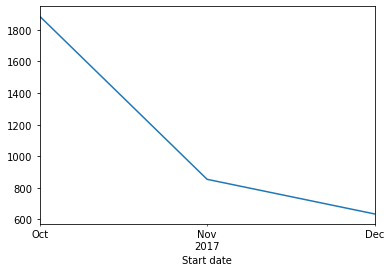

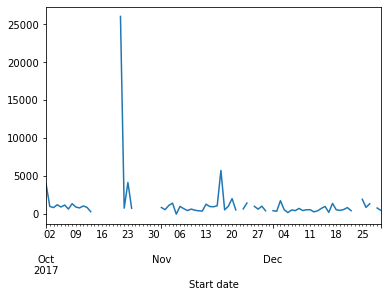

In [90]:
# Graficando:

rides\
.resample("M", on = "Start date")["Duration seconds"]\
.mean()\
.plot()

plt.show()

rides\
.resample("D", on = "Start date")["Duration seconds"]\
.mean()\
.plot()

plt.show()

### Métodos adicionales en Pandas

In [91]:
rides["Duration"].dt.total_seconds().min()

# Hay que modificar la zona horaria:

rides["Start date"].head(3).dt.tz_localize("America/New_York")

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

In [92]:
# Datetimes ambiguos (horario de verano)
rides["Start date"] = rides["Start date"].dt.tz_localize("America/New_York", ambiguous = "NaT")
rides["End date"] = rides["End date"].dt.tz_localize("America/New_York", ambiguous = "NaT")

In [93]:
# Recalculando duración, ignorando el renglón ambiguo:

rides["Duration"] = rides["End date"] - rides["Start date"]

print(rides["Duration"].dt.total_seconds().min())

116.00000000000001


In [94]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M',on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64


# REGEX

In [95]:
short_movies = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/short_movies.csv")
short_tweets = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/short_tweets.csv")
wikipedia = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/wikipedia.csv")

## MANIPULACIÓN DE CADENAS BÁSICA

In [96]:
# Longitud de cadenas:

my_string = "Awesome day"

print(len(my_string))

# Convertir a cadena:

print(str(123))

# Concatenar:

my_string1 = "Awesome day"
my_string2 = "for biking"

print(my_string1 + " " + my_string2)

# Indexación:

print(my_string[3])

print(my_string[-8])

print(my_string[0:3])

print(my_string[:5])

# Stride:

print(my_string[0:6:2]) # caracteres entre posiciones 0 y 6, omitiendo dos caracteres intermedios

print(my_string[::-1])

11
123
Awesome day for biking
s
s
Awe
Aweso
Aeo
yad emosewA


In [97]:
movie = "fox and kelley soon become bitter rivals because the new fox books store is opening up right across the block from the small business ."

# Find characters in movie variable
length_string = len(movie)

# Convert to string
to_string = str(length_string)

# Predefined variable
statement = "Number of characters in this review:"

# Concatenate strings and print result
print(statement + " " + to_string)

Number of characters in this review: 135


In [98]:
movie1 = "the most significant tension of _election_ is the potential relationship between a teacher and his student ."

# Select the first 32 characters of movie1
first_part = movie1[:32]

# Select from 43rd character to the end of movie1
last_part = movie1[42:]


In [99]:
# Get the word
movie_title = movie[11:30]

# Obtain the palindrome
palindrome = movie_title[::-1]

# Print the word if it's a palindrome
if movie_title == palindrome:
    print(movie_title)

### Operaciones con cadenas

In [100]:
# Mayúsculas y minúsculas

my_string = "tHis Is a niCe StriNg"

print(my_string.lower())

print(my_string.upper())

print(my_string.capitalize())

this is a nice string
THIS IS A NICE STRING
This is a nice string


In [101]:
# Splitting

my_string = "This string will be split"

print(my_string.split(sep = " ", maxsplit = 2)) # el split comienza a la izquierda

print(my_string.rsplit(sep = " ", maxsplit = 2)) # el split comienza a la derecha

['This', 'string', 'will be split']
['This string will', 'be', 'split']


In [102]:
my_string = "This string will be split\nin two"

print(my_string)

my_string.splitlines()

This string will be split
in two


['This string will be split', 'in two']

In [103]:
# Joining

my_list = ["this", "would", "be", "a", "string"]

print(" ".join(my_list))

this would be a string


In [104]:
# Stripping

my_string = " This string will be stripped\n"

print(my_string.strip()) # eliminó tanto el espacio como el linebreak

print(my_string.rstrip()) # solo elimina el linbreak de la derecha

print(my_string.lstrip()) # solo elimina el espacio de la izquierda


This string will be stripped
 This string will be stripped
This string will be stripped



In [105]:
# Ejemplo

movie = "$I supposed that coming from MTV Films I should expect no less$"

# Convert to lowercase and print the result
movie_lower = movie.lower()
print(movie_lower)

# Remove specified character and print the result
movie_no_sign = movie_lower.strip("$")
print(movie_no_sign)

# Split the string into substrings and print the result
movie_split = movie_no_sign.split()
print(movie_split)

# Select root word and print the result
word_root = movie_split[1][:-1]
print(word_root)

$i supposed that coming from mtv films i should expect no less$
i supposed that coming from mtv films i should expect no less
['i', 'supposed', 'that', 'coming', 'from', 'mtv', 'films', 'i', 'should', 'expect', 'no', 'less']
suppose


In [106]:
movie = "the film,however,is all good<\i>"

# Remove tags happening at the end and print results
movie_tag = movie.rstrip("<\i>")
print(movie_tag)

# Split the string using commas and print results
movie_no_comma = movie_tag.split(",")
print(movie_no_comma)

# Join back together and print results
movie_join = " ".join(movie_no_comma)
print(movie_join)


the film,however,is all good
['the film', 'however', 'is all good']
the film however is all good


In [107]:
file = "mtv films election, a high school comedy, is a current example \nfrom there, director steven spielberg wastes no time, taking us into the water on a midnight swim"

# Split string at line boundaries
file_split = file.splitlines()

# Print file_split
print(file_split)

# Complete for-loop to split by commas
for substring in file_split:
    substring_split = substring.split(",")
    print(substring_split)

['mtv films election, a high school comedy, is a current example ', 'from there, director steven spielberg wastes no time, taking us into the water on a midnight swim']
['mtv films election', ' a high school comedy', ' is a current example ']
['from there', ' director steven spielberg wastes no time', ' taking us into the water on a midnight swim']


### Encontrar y reemplazar

In [108]:
my_string = "Where's Waldo?"

print(my_string.find("Waldo")) # que es el índice mínimo donde se encuentra la cadena

print(my_string.find("Welda")) # como no la encuentra, regresa -1

my_string.find("Waldo", 0 , 6) # no encuentra la cadena en los posiciones indicadas

8
-1


-1

In [109]:
# Alternativamente, .index() funciona igual:

print(my_string.index("Waldo"))

# print(my_string.index("Welda")) arroja un error:

try:
    my_string.index("Wenda")
except ValueError:
    print("Not found")

8
Not found


In [110]:
# Counting:

my_string = "Hoy may fruits do you have un your fruit basket?"

print(my_string.count("fruit"))

print(my_string.count("fruit", 0, 16))

2
1


In [111]:
# Replacing:

my_string = "The red house is between the blue house and the old house"

print(my_string.replace("house", "car"))

print(my_string.replace("house", "car", 2)) # se indica que solo se harán dos reemplazos en las primeras 2 ocurrencias

The red car is between the blue car and the old car
The red car is between the blue car and the old house


In [112]:
# Ejemplo

movies = short_movies[["text"]]
movies = short_movies.iloc[[200, 201, 202]]

print(movies)

for movie in movies:
  	# If actor is not found between character 37 and 41 inclusive
    # Print word not found
    if movie.find("actor", 37, 42) == -1:
        print("Word not found")
    # Count occurrences and replace two with one
    elif movie.count("actor") == 2:  
        print(movie.replace("actor actor", "actor"))
    else:
        # Replace three occurrences with one
        print(movie.replace("actor actor actor", "actor"))

     id    tag   html  sent id  \
200   0  cv006  15448       16   
201   0  cv006  15448       17   
202   0  cv006  15448       18   

                                                  text target  
200  it's clear that he's passionate about his beli...    pos  
201  I believe you I always said that the actor act...    pos  
202  it's astonishing how frightening the actor act...    pos  
Word not found
Word not found
Word not found
Word not found
Word not found
Word not found


In [113]:
movies = short_movies[["text"]]
movies = short_movies.iloc[[137, 138]]

for movie in movies:
  # Find the first occurrence of word
  print(movie.find("money", 12, 51))
    
for movie in movies:
  try:
    # Find the first occurrence of word
  	print(movie.index("money", 12, 51))
  except ValueError:
    print("substring not found")

-1
-1
-1
-1
-1
-1
substring not found
substring not found
substring not found
substring not found
substring not found
substring not found


In [114]:
movies = "the rest of the story isn't important because all it does is serve as a mere backdrop for the two stars to share the screen ."

# Replace negations 
movies_no_negation = movies.replace("isn't", "is")

# Replace important
movies_antonym = movies_no_negation.replace("important", "insignificant")

# Print out
print(movies_antonym)

the rest of the story is insignificant because all it does is serve as a mere backdrop for the two stars to share the screen .


## FORMATEANDO CADENAS

In [115]:
print("Machine learning provides {} the ability to learn {}".format("systems", "automatically"))

Machine learning provides systems the ability to learn automatically


In [116]:
my_string = "{} rely on {} datasets"
method = "Supervised algorithms"
condition = "labeled"

print(my_string.format(method, condition))

Supervised algorithms rely on labeled datasets


In [117]:
print("{} has a friend called {} and a sister called {}".format("Betty", "Linda", "Daisy"))

print("{2} has a friend called {0} and a sister called {1}".format("Betty", "Linda", "Daisy"))

Betty has a friend called Linda and a sister called Daisy
Daisy has a friend called Betty and a sister called Linda


In [118]:
tool = "Unsupervised algorithms"
goal = "patterns"

print("{title} try to find {aim} in the dataset".format(title = tool, aim = goal))

Unsupervised algorithms try to find patterns in the dataset


In [119]:
my_methods = {"tool": "Unsupervised algorithms", "goal":"patterns"}

print("{data[tool]} try to find {data[goal]} in the dataset".format(data = my_methods))

Unsupervised algorithms try to find patterns in the dataset


In [120]:
# Especificador de formato

print("Only {0:.2f}% of the {1} produced worldwide is {2}!".format(0.5155675, "data", "analyzed"))

Only 0.52% of the data produced worldwide is analyzed!


In [121]:
# Fechas y tiempo

print("Today's date is {:%Y-%m-%d %H:%M}".format(datetime.now()))

Today's date is 2022-07-22 09:40


In [122]:
# Ejemplo

wikipedia_article = "In computer science, artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals."

# Assign the substrings to the variables
first_pos = wikipedia_article[3:19].lower()
second_pos = wikipedia_article[21:44].lower()

# Define string with placeholders 
my_list.append("The tool {} is used in {}")

# Define string with rearranged placeholders
my_list.append("The tool {1} is used in {0}")

# Use format to print strings
for my_string in my_list:
    print(my_string.format(first_pos, second_pos))

this
would
be
a
string
The tool computer science is used in artificial intelligence
The tool artificial intelligence is used in computer science


### Método literal

In [123]:
way = "code"
method = "learning Python faster"

print(f"Practicing how to {way} is the best method for {method}")

Practicing how to code is the best method for learning Python faster


In [124]:
name = "Python"

print(f"Python is called {name!r} due to comedy series")

###

number = 90.41899041

print(f"In the last 2 year, {number:.2f}% of the data was produced worldwide!")

###

my_today = datetime.now()

print(f"Today's date is {my_today:%B %d, %Y}")

Python is called 'Python' due to comedy series
In the last 2 year, 90.42% of the data was produced worldwide!
Today's date is July 22, 2022


In [125]:
family = {"dad":"John", "siblings": "Peter"}
    
print(f"Is your dad called {family['dad']}?")

Is your dad called John?


In [126]:
# Operaciones inline

my_number = 4
my_multiplier = 7

print(f"{my_number} multiplied by {my_multiplier} is {my_number * my_multiplier}")

###

number1 = 120
number2 = 7

# Include both variables and the result of dividing them 
print(f"{number1} tweets were downloaded in {number2} minutes indicating a speed of {(number1 / number2):.1f} tweets per min")

4 multiplied by 7 is 28
120 tweets were downloaded in 7 minutes indicating a speed of 17.1 tweets per min


In [127]:
# Calling functions

def my_function(a, b):
    return a + b

print(f"If you sum up 10 and 20 the result is {my_function(10, 20)}")

If you sum up 10 and 20 the result is 30


### Template method

In [128]:
from string import Template

my_string = Template("Data science has been called $identifier")

my_string.substitute(identifier = "sexties job of the 21st century")

'Data science has been called sexties job of the 21st century'

In [129]:
job = "Data science"
name = "sexies job of the 21st century"
my_string = Template("$title has been called $description")

my_string.substitute(title = job, description = name)

'Data science has been called sexies job of the 21st century'

In [130]:
my_string = Template("I find Python very ${noun}ing but my sister has lost $noun")

my_string.substitute(noun = "interest")

'I find Python very interesting but my sister has lost interest'

In [131]:
my_string = Template("I paid for the Python course only $$ $price, amazing!")
my_string.substitute(price = "12.50")

'I paid for the Python course only $ 12.50, amazing!'

In [132]:
favorite = dict(flavor = "chocolate")

my_string = Template("I love $flavor $cake very much")

try:
    my_string.substitute(favorite)
except KeyError:
    print("missing information")

missing information


In [133]:
favorite = dict(flavor = "chocolate")

my_string = Template("I love $flavor $cake very much")

my_string.safe_substitute(favorite)

'I love chocolate $cake very much'

En resumen:
    
- str.format() es el método base, compatible con todas las versiones de Python
- f-strings es la más recomendable sobre todos lode métodos
- Template strings es buena para trabajar con cadenas externas o proveídas por el usuario

## REGEX Y EMPAREJAMIENTO DE PATRONES

### Introducción a RegEx

Considérese la siguiente expresión RegEx: `r'st\d\s\w{3,10}'`

- r': indica una cadena sin procesar (recomendable siempre usarla)
- `\d`: un dígito
- `\s`: un espacio
- `\w`: un caracter de palabra
- `{3, 10}`: indica que `\w` debe aparecer entre 3 y 10 veces

In [134]:
import re

# .findall() encuentra todas las coincidencias indicadas en una cadena:

re.findall(r"#movies", "Love #movies! I had fun yesterday going to the #movies")

# Para separar la cadena en cada coincidencia:

re.split(r"!", "Nice Place to eat! I'll come back! Excellent meat!")

# Para reemplazar un patrón con otro:

re.sub(r"yellow", "nice", "I have a yellow car and a yellow house in a yellow neighborhood")

'I have a nice car and a nice house in a nice neighborhood'

In [135]:
print(re.findall(r"User\d", "The winners are: User9, UserN, User8")) # dígitos

print(re.findall(r"User\D", "The winners are: User9, UserN, User8")) # no dígito

print(re.findall(r"User\w", "The winners are: User9, UserN, User8")) # cualquier caracter

print(re.findall(r"\W\d", "This skirt is on sale, only $5 today!")) # \W: no caracter de palabra y \d: dígito

print(re.findall(r"Data\sScience", "I enjoyed learning Data Science")) # espacio

print(re.sub(r"ice\Scream", "ice cream", "I really like ice-cream"))  # reeplazando el guión, \S: no espacio

['User9', 'User8']
['UserN']
['User9', 'UserN', 'User8']
['$5']
['Data Science']
I really like ice cream


In [136]:
# Ejemplo

sentiment_analysis = "@robot9! @robot4& I have a good feeling that the show isgoing to be amazing! @robot9$ @robot7%"

# Write the regex
regex = r"@robot\d\W"

# Find all matches of regex
print(re.findall(regex, sentiment_analysis))

['@robot9!', '@robot4&', '@robot9$', '@robot7%']


In [137]:
sentiment_analysis = "Unfortunately one of those moments wasn't a giant squid monster. User_mentions:2, likes: 9, number of retweets: 7"

print(re.findall(r"User_mentions:\d", sentiment_analysis))
print(re.findall(r"likes:\s\d", sentiment_analysis))
print(re.findall(r"number\sof\sretweets:\s\d", sentiment_analysis))

['User_mentions:2']
['likes: 9']
['number of retweets: 7']


In [138]:
sentiment_analysis = "He#newHis%newTin love with$newPscrappy. #8break%He is&newYmissing him@newLalready"

# Write a regex to match pattern separating sentences
regex_sentence = r"\W\dbreak\W"

# Replace the regex_sentence with a space
sentiment_sub = re.sub(regex_sentence, " ", sentiment_analysis)

print(sentiment_sub)

# Write a regex to match pattern separating words
regex_words = r"\Wnew\w"

# Replace the regex_words and print the result
sentiment_final = re.sub(regex_words, " ", sentiment_sub)
print(sentiment_final)

He#newHis%newTin love with$newPscrappy.  He is&newYmissing him@newLalready
He is in love with scrappy.  He is missing him already


### Repeticiones

In [139]:
password = "password1234"

print(re.search(r"\w\w\w\w\w\w\w\w\d\d\d\d", password))

# Alternativamente:

print(re.search(r"\w{8}\d{4}", password))

<re.Match object; span=(0, 12), match='password1234'>
<re.Match object; span=(0, 12), match='password1234'>


In [140]:
text = "Date of start: 4-3. Date of registration: 10-04"

# Para indicar un caracter que aparece una o más veces, usamos "+":

print(re.findall(r"\d+-\d+", text))

# Para indicar que un caracter debe aparecer cero o más veces, se usa "*":

my_string = "The concert was amazing! @ameli!a @joh&&n @mary90"

print(re.findall(r"@\w+\W*\w+", my_string))

# Para undicar que un caracter debe aparecer cero veces o una vez, se usa "?":

text = "The color of this image is amazing. However, the colour blue could be brighter."

print(re.findall(r"colou?r", text))

# Finalmente, las llaves indican que un caracter debe aparecer n veces por lo menos, y m como máximo: {n, m}:

phone_number = "John: 1-966-847-3131 Michelle: 54-908-42-42424"

print(re.findall(r"\d{1,2}-\d{3}-\d{2,3}-\d{4,}", phone_number))

['4-3', '10-04']
['@ameli!a', '@joh&&n', '@mary90']
['color', 'colour']
['1-966-847-3131', '54-908-42-42424']


In [141]:
# Ejemplo

sentiment_analysis = short_tweets[["text"]].iloc[[545, 546, 547]]

print(sentiment_analysis)

for tweet in sentiment_analysis:
    print(re.findall(r"http\S+", tweet))
    print(re.findall(r"@\w+", tweet))



                                                  text
545  Boredd. Colddd @blueKnight39 Internet keeps st...
546  I had a horrible nightmare last night @anitaLo...
547  im lonely  keep me company @YourBestCompany! @...
[]
[]


In [142]:
sentiment_analysis = short_tweets[["text"]].iloc[[232, 233, 234]]

print(sentiment_analysis)

# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
	print(re.findall(r"\d{1,2}\w+\s\w+\s\d{4}", date))

# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
	print(re.findall(r"\d{1,2}\w+\s\w+\s\d{4}\s\d{1,2}:\d{2}", date))

                                                  text
232  I would like to apologize for the repeated Vid...
233  @zaydia but i cant figure out how to get there...
234  FML: So much for seniority, bc of technologica...
[]
[]


In [143]:
sentiment_analysis = "ITS NOT ENOUGH TO SAY THAT IMISS U #MissYou #SoMuch #Friendship #Forever"

# Write a regex matching the hashtag pattern
regex = r"#\w+"

# Replace the regex by an empty string
no_hashtag = re.sub(regex, "", sentiment_analysis)

# Get tokens by splitting text
print(re.split(r"\s+", no_hashtag))


['ITS', 'NOT', 'ENOUGH', 'TO', 'SAY', 'THAT', 'IMISS', 'U', '']


### Otros metacaracteres

In [144]:
print(re.search(r"\d{4}", "4506 people attend the show"))

print(re.match(r"\d{4}", "4506 people attende the show"))

# La diferencia es que match busca desde el inicio de la cadena:

print(re.search(r"\d+", "Yesterday, I saw 3 shows"))
print(re.match(r"\d+", "Yesterday, I saw 3 shows"))

<re.Match object; span=(0, 4), match='4506'>
<re.Match object; span=(0, 4), match='4506'>
<re.Match object; span=(17, 18), match='3'>
None


In [145]:
# Para encoentrar cualquier caracter:

my_links = "Just check out this link: www.amazingpics.com. I has amazing photos!"

print(re.findall(r"www.+com", my_links))

# Comienzo de una cadena:

my_string = "the 80s music was much better that the 90s"

print(re.findall(r"^the\s\d+s", my_string))

# Final de una cadena:

print(re.findall(r"the\s\d+s$", my_string))

# Caracteres especiales escape:

my_string = "I love the music of Mr.Go. However, the sound was too loud."

print(re.split(r"\.\s", my_string))

# Operador OR:

my_string = "Elephants are the world's largest land animal! I would love to see an elephant one day."

print(re.findall(r"Elephant|elephant", my_string))

# Que también puede representarse con []:

my_string = "Yesterday I spent my afternoon with my friends: MaryJohn2 Clary3"

print(re.findall(r"[a-zA-Z]+\d", my_string)) # encuentra caracteres minúsculos o mayúsculos seguidos de un dígito

# Para reemplazar los caracteres no de palabras con espacios:

my_string = "My&name&is#John Smith. I%live$in#London"

print(re.sub(r"[#$%&]", " ", my_string))

# Para convertir a negativo:

my_links = "Bad website: www.99.com. Favorite site: www.hola.com"

print(re.findall(r"www[^0-9]+com", my_links)) # identifica el link que no contenga ningún número

['www.amazingpics.com']
['the 80s']
['the 90s']
['I love the music of Mr.Go', 'However, the sound was too loud.']
['Elephant', 'elephant']
['MaryJohn2', 'Clary3']
My name is John Smith. I live in London
['www.hola.com']


### Emparejamiento greedy vs. not greedy

Los cuantificadores usados hasta ahora son del tipo greedy por default: emparejan tantos caracteres como sea posible y regresan la pareja más larga.

In [146]:
# Greedy:

print(re.match(r"\d+", "12345bcada"))

print(re.match(r".*hello", "xhelloxxxxxx"))

# Not-Greedy, se usa un "?" al final del cuantificador:

print(re.match(r"\d+?", "12345bcada")) # como con "+" requerimos uno o más, el cuantificador no greedy regresará uno, que cumplea la condición

print(re.match(r".*?hello", "xhelloxxxxxx"))

<re.Match object; span=(0, 5), match='12345'>
<re.Match object; span=(0, 6), match='xhello'>
<re.Match object; span=(0, 1), match='1'>
<re.Match object; span=(0, 6), match='xhello'>


In [147]:
# Ejemplo

string = "I want to see that <strong>amazing show</strong> again!."

# Write a regex to eliminate tags
string_notags = re.sub(r"<.+?>", "", string)

# Print out the result
print(string_notags)

I want to see that amazing show again!.


In [148]:
sentiment_analysis = "Was intending to finish editing my 536-page novel manuscript tonight, but that will probably not happen. And only 12 pages are left "

# Write a lazy regex expression 
numbers_found_lazy = re.findall(r"[0-9]+?", sentiment_analysis)

# Print out the result
print(numbers_found_lazy)

# Write a greedy regex expression 
numbers_found_greedy = re.findall(r"[0-9]+", sentiment_analysis)

# Print out the result
print(numbers_found_greedy)

['5', '3', '6', '1', '2']
['536', '12']


In [149]:
sentiment_analysis = "Put vacation photos online (They were so cute) a few yrs ago. PC crashed, and now I forget the name of the site (I'm crying). "

# Write a greedy regex expression to match 
sentences_found_greedy = re.findall(r"\(.*\)", sentiment_analysis)

# Print out the result
print(sentences_found_greedy)

# Write a lazy regex expression
sentences_found_lazy = re.findall(r"\(.*?\)", sentiment_analysis)

# Print out the results
print(sentences_found_lazy)

["(They were so cute) a few yrs ago. PC crashed, and now I forget the name of the site (I'm crying)"]
['(They were so cute)', "(I'm crying)"]


## CONCEPTOS AVANZADOS DE REGEX

### Agrupamientos

In [150]:
text = "Clary has 2 friends who she spends a lot time with. Susan has 3 brothers while John has 4 sisters."

print(re.findall(r"[A-Za-z]+\s\w+\s\d+\s\w+", text))

# Pero queremos quitar la palabras "has". Para ello se agrupa con ():

print(re.findall(r"([A-Za-z]+)\s\w+\s(\d+)\s(\w+)", text))

['Clary has 2 friends', 'Susan has 3 brothers', 'John has 4 sisters']
[('Clary', '2', 'friends'), ('Susan', '3', 'brothers'), ('John', '4', 'sisters')]


In [151]:
pets = re.findall(r"([A-Za-z]+)\s\w+\s(\d+)\s(\w+)", "Clary has 2 dogs but John has 3 cats.")

print(pets)
print(pets[0][0])

[('Clary', '2', 'dogs'), ('John', '3', 'cats')]
Clary


In [152]:
print(re.search(r"(\d[A-Za-z])+", "My user name is 3e4r5fg"))

# Que no es lo mismo que:

my_string = "My lucky numbers are 8755 and 33"

print(re.findall(r"(\d)+", my_string)) # que arroja los dígitos que se repiten una o más veces

print(re.findall(r"(\d+)", my_string))

<re.Match object; span=(16, 22), match='3e4r5f'>
['5', '3']
['8755', '33']


### Pipe

In [153]:
my_string = "I want to have a pet. But I don't know if I want a cat, a dog or a bird."

print(re.findall(r"cat|dog|bird", my_string))

my_string = "I want to have a pet. But I don't know if I want 2 cats, 1 dog or a bird."

print(re.findall(r"(\d)+\s(cat|dog|bird)", my_string)) # que arroja las cadenas que vienen después de un dígito

['cat', 'dog', 'bird']
[('2', 'cat'), ('1', 'dog')]


### Non-capturing groups

In [154]:
my_string = "John Smith: 34-34-34-042-980, Rebeca Smith: 10-10-10-434-425"

# Para extraer la última parte, sin los elementos repetidos:

print(re.findall(r"(?:\d{2}-){3}(\d{3}-\d{3})", my_string))

###

my_date = "Today is 23rd May 2019. Tomorrow is 24th May 19"

# Para capturar los números de días, sin las letras:

print(re.findall(r"(\d+)(?:th|rd)", my_date))

['042-980', '434-425']
['23', '24']


In [155]:
# Ejemplo

sentiment_analysis = ['I totally love the concert The Book of Souls World Tour. It kinda amazing!', 'I enjoy the movie Wreck-It Ralph. I watched with my boyfriend.', "I still like the movie Wish Upon a Star. Too bad Disney doesn't show it anymore."]

# Write a regex that matches sentences with the optional words
regex_positive = r"(love|like|enjoy).+?(movie|concert)\s(.+?)\."

for tweet in sentiment_analysis:
	# Find all matches of regex in tweet
    positive_matches = re.findall(regex_positive, tweet)
    
    # Complete format to print out the results
    print("Positive comments found {}".format(positive_matches))

Positive comments found [('love', 'concert', 'The Book of Souls World Tour')]
Positive comments found [('enjoy', 'movie', 'Wreck-It Ralph')]
Positive comments found [('like', 'movie', 'Wish Upon a Star')]


In [156]:
sentiment_analysis = ['That was horrible! I really dislike the movie The cabin and the ant. So boring.', "I disapprove the movie Honest with you. It's full of cliches.", 'I dislike very much the concert After twelve Tour. The sound was horrible.']

# Write a regex that matches sentences with the optional words
regex_negative = r"(hate|dislike|disapprove).+?(?:movie|concert)\s(.+?)\."

for tweet in sentiment_analysis:
	# Find all matches of regex in tweet
    negative_matches = re.findall(regex_negative, tweet)
    
    # Complete format to print out the results
    print("Negative comments found {}".format(negative_matches))

Negative comments found [('dislike', 'The cabin and the ant')]
Negative comments found [('disapprove', 'Honest with you')]
Negative comments found [('dislike', 'After twelve Tour')]


### Backreferences

In [157]:
text = "PYthon 3.0 was released on 12-03-2008"

information = re.search("(\d{1,2})-(\d{2})-(\d{4})", text)

print(information.group(3))

print(information.group(0))

2008
12-03-2008


In [158]:
# También se pueden nombrar a los grupos de captura:

text = "Austin, 78701"

cities = re.search(r"(?P<city>[A-Za-z]+).*?(?P<zipcode>\d{5})", text)

print(cities.group("city"))

print(cities.group("zipcode"))

Austin
78701


In [159]:
sentence = "I wish you a happy happy birthday!"

print(re.findall(r"(\w+)\s\1", sentence)) # el \1 indica que el proceso se repite una vez más una vez que ha concluido

print(re.sub(r"(\w+)\s\1", r"\1", sentence)) # que reemplaza toda la coincidencia en la expresión con el primer grupo capturado

['happy']
I wish you a happy birthday!


In [160]:
sentence = "Your new code number es 23434. Please, enter 23434 to open the door."

print(re.findall(r"(?P<code>\d{5}).*?(?P=code)", sentence))

['23434']


In [161]:
# En el siguiente código se quiere reemplazar las palabras repetidas por una aparición de la misma palabra:

sentence = "This app is not working! It's repeating the last word word"

print(re.sub(r"(?P<word>\w+)\s(?P=word)", r"\g<word>", sentence))

This app is not working! It's repeating the last word


### Lookaround

In [162]:
# Positivo:

my_text = "tweets.txt transferred, mypass.txt transferred, keywords.txt error"

print(re.findall(r"\w+\.txt(?=\stransferred)", my_text))

# Negativo:

print(re.findall(r"\w+\.txt(?!\stransferred)", my_text))

['tweets.txt', 'mypass.txt']
['keywords.txt']


In [163]:
# Con grupos:

my_text = "Member: Angus Young, Member: Chris Slade, Past: Malcolm Young, Past: Cliff Williams."

print(re.findall(r"(?<=Member:\s)\w+\s\w+", my_text))

my_text = "My white cat sat at the table. However, my brown dog was lying on the couch"

print(re.findall(r"(?<!brown\s)(cat|dog)", my_text))

['Angus Young', 'Chris Slade']
['cat']


In [164]:
# Ejemplo

sentiment_analysis = "You need excellent python skills to be a data scientist. Must be! Excellent python"

# Positive lookahead
look_ahead = re.findall(r"\w+(?=\spython)", sentiment_analysis)

# Print out
print(look_ahead)

# Positive lookbehind
look_behind = re.findall(r"(?<=[Pp]ython\s)\w+", sentiment_analysis)

# Print out
print(look_behind)

['excellent', 'Excellent']
['skills']


In [165]:
cellphones = ['4564-646464-01', '345-5785-544245', '6476-579052-01']

for phone in cellphones:
	# Get all phone numbers not preceded by area code
	number = re.findall(r"(?<!\d{3}-)\d{4}-\d{6}-\d{2}", phone)
	print(number)
    
for phone in cellphones:
	# Get all phone numbers not followed by optional extension
	number = re.findall(r"\d{3}-\d{4}-\d{6}(?!-\d{2})", phone)
	print(number)

['4564-646464-01']
[]
['6476-579052-01']
[]
['345-5785-544245']
[]


# CÓDIGOS EFICIENTES

## INTRODUCCIÓN

In [166]:
# Considérese los siguientes dos ejemplos de código Python:

# Non-Pythonic:

doubled_numbers = []

# for i in range(len(numbers)):
#    doubled_numbers.append(numbers[i] * 2)

# Pythonic:
#    doubled_numbers = [x * 2 for x in numbers]

In [167]:
# Non-Pythonic

names = ['Jerry', 'Kramer', 'Elaine', 'George', 'Newman']

# Print the list created using the Non-Pythonic approach
i = 0
new_list= []
while i < len(names):
    if len(names[i]) >= 6:
        new_list.append(names[i])
    i += 1
print(new_list)

# More Pythonic

# Print the list created by looping over the contents of names
better_list = []
for name in names:
    if len(name) >= 6:
        better_list.append(name)
print(better_list)

# Super Pythonic

# Print the list created by using list comprehension
best_list = [name for name in names if len(name) >= 6]
print(best_list)

['Kramer', 'Elaine', 'George', 'Newman']
['Kramer', 'Elaine', 'George', 'Newman']
['Kramer', 'Elaine', 'George', 'Newman']


In [168]:
# En vez de escribir muchos números seguidos para una lista, es preferible usar range:

nums = range(0, 11)

nums_list = list(nums)

print(nums_list)

# La función range aceptar un valor de inicio, parada y de skip:

even_nums = range(2, 11, 2)

even_nums_list = list(even_nums)

print(even_nums_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 4, 6, 8, 10]


In [169]:
# enumarate() crea elementos de índice para cada elemento del objeto proporcionado:

letters = ["a", "b", "c", "d"]

indexed_letters = enumerate(letters)

indexed_letters_list = list(indexed_letters)

print(indexed_letters_list)

###

letters = ["a", "b", "c", "d"]

indexed_letters = enumerate(letters, start = 5)

indexed_letters_list = list(indexed_letters)

print(indexed_letters_list)

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd')]
[(5, 'a'), (6, 'b'), (7, 'c'), (8, 'd')]


In [170]:
# map() aplica una función sobre un objeto:

nums = [1.2, 2.3, 3.4, 4.6, 5.0]

rnd_nums = map(round, nums)

print(list(rnd_nums))

# Con lambda:

nums = [1, 2, 3, 4, 5]

sqrd_nums = map(lambda x: x ** 2, nums)

print(list(sqrd_nums))

[1, 2, 3, 5, 5]
[1, 4, 9, 16, 25]


In [171]:
# Ejemplo

# Create a range object that goes from 0 to 5
nums = range(6)
print(type(nums))

# Convert nums to a list
nums_list = list(nums)
print(nums_list)

# Create a new list of odd numbers from 1 to 11 by unpacking a range object
nums_list2 = [*range(1,12,2)]
print(nums_list2)

<class 'range'>
[0, 1, 2, 3, 4, 5]
[1, 3, 5, 7, 9, 11]


In [172]:
# Rewrite the for loop to use enumerate
indexed_names = []
for i,name in enumerate(names):
    index_name = (i,name)
    indexed_names.append(index_name) 
print(indexed_names)

# Rewrite the above for loop using list comprehension
indexed_names_comp = [(i,name) for i,name in enumerate(names)]
print(indexed_names_comp)

# Unpack an enumerate object with a starting index of one
indexed_names_unpack = [*enumerate(names, 1)]
print(indexed_names_unpack)

[(0, 'Jerry'), (1, 'Kramer'), (2, 'Elaine'), (3, 'George'), (4, 'Newman')]
[(0, 'Jerry'), (1, 'Kramer'), (2, 'Elaine'), (3, 'George'), (4, 'Newman')]
[(1, 'Jerry'), (2, 'Kramer'), (3, 'Elaine'), (4, 'George'), (5, 'Newman')]


In [173]:
# Use map to apply str.upper to each element in names
names_map  = map(str.upper, names)

# Print the type of the names_map
print(type(names_map))

# Unpack names_map into a list
names_uppercase = [*names_map]

# Print the list created above
print(names_uppercase)

<class 'map'>
['JERRY', 'KRAMER', 'ELAINE', 'GEORGE', 'NEWMAN']


### NumPy arrays

In [174]:
import numpy as np

# Recuérdese que las arrays de NumPy son homogéneas, o sea que solo pueden contener elementos del mismo tipo:

nums_np_ints = np.array([1, 2, 3])

print(nums_np_ints.dtype)

# Las NumPy arrays permiten transmisión:

nums_np = np.array([-2, -1, 0, 1, 2])

print(nums_np ** 2)

# Indexación booleana:

print(nums_np > 0)

nums_np[nums_np > 0]

int32
[4 1 0 1 4]
[False False False  True  True]


array([1, 2])

In [175]:
# Ejemplo

nums = np.arange(1, 11)
nums = nums.reshape(2,5)
print(nums)

# Print second row of nums
print(nums[1,:])

# Print all elements of nums that are greater than six
print(nums[nums > 6])

# Double every element of nums
nums_dbl = nums * 2
print(nums_dbl)

# Replace the third column of nums
nums[:,2] = nums[:,2] + 1
print(nums)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[ 6  7  8  9 10]
[ 7  8  9 10]
[[ 2  4  6  8 10]
 [12 14 16 18 20]]
[[ 1  2  4  4  5]
 [ 6  7  9  9 10]]


In [176]:
names = ['Jerry', 'Kramer', 'Elaine', 'George', 'Newman']

###

def welcome_guest(guest_and_time):
    """
    Returns a welcome string for the guest_and_time tuple.
    
    Args:
        guest_and_time (tuple): The guest and time tuple to create
            a welcome string for.
            
    Returns:
        welcome_string (str): A string welcoming the guest to Festivus.
        'Welcome to Festivus {guest}... You're {time} min late.'
    
    """
    guest = guest_and_time[0]
    arrival_time = guest_and_time[1]
    welcome_string = "Welcome to Festivus {}... You're {} min late.".format(guest,arrival_time)
    return welcome_string

###

# Create a list of arrival times
arrival_times = [*range(10,60,10)]

# Convert arrival_times to an array and update the times
arrival_times_np = np.array(arrival_times)
new_times = arrival_times_np - 3

# Use list comprehension and enumerate to pair guests to new times
guest_arrivals = [(names[i],time) for i,time in enumerate(new_times)]

# Map the welcome_guest function to each (guest,time) pair
welcome_map = map(welcome_guest, guest_arrivals)

guest_welcomes = [*welcome_map]
print(*guest_welcomes, sep='\n')

Welcome to Festivus Jerry... You're 7 min late.
Welcome to Festivus Kramer... You're 17 min late.
Welcome to Festivus Elaine... You're 27 min late.
Welcome to Festivus George... You're 37 min late.
Welcome to Festivus Newman... You're 47 min late.


## CÓDIGO, TIMEIT Y PERFIL

Para calcular el tiempo de código se usa el comando $timeit

In [177]:
# Considérese que se quiere inspeccionar el runtime del siguiente código:

rand_nums = np.random.rand(1000)

# usando %timeit:

%timeit rand_nums = np.random.rand(1000)

# Se puede especificar el número de runs y loops:

%timeit -r2 -n10 rand_nums = np.random.rand(1000)

7.26 µs ± 396 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
The slowest run took 6.47 times longer than the fastest. This could mean that an intermediate result is being cached.
25.5 µs ± 18.7 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [178]:
# %timeit puede usarse en más de una línea de código:

# Una línea:

%timeit nums = [x for x in range(10)]

# Varias líneas:

607 ns ± 12.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [179]:
%%timeit
nums = []
for x in range(10):
    nums.append(x) # %%timeit debe de ser la primera línea de la celda en Jupyter

883 ns ± 42.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [180]:
# Para guardar el resultado:

times = %timeit -o rand_nums = np.random.rand(1000)

print(times.timings)

# Best run:

print(times.best)

# Worst run:

print(times.worst)

9.55 µs ± 4.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[2.0652600000000376e-05, 9.64507999999995e-06, 7.898430000000189e-06, 7.55515000000031e-06, 7.080149999999463e-06, 6.986630000000105e-06, 7.024850000000526e-06]
6.986630000000105e-06
2.0652600000000376e-05


### Comparando tiempos

In [181]:
# Para comparar el tiempo de crear un diccionario de manera literal vs. formal:

f_time = %timeit -o formal_dict = dict()

l_time = %timeit -o literal_dict = {}

diff = (f_time.average -  l_time.average) * (10**9)

print("l_time better than f_time by {} ns".format(diff))

103 ns ± 6.02 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
29.5 ns ± 2.71 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
l_time better than f_time by 72.99693285714284 ns


In [182]:
# Ejemplo

# Create a list of integers (0-50) using list comprehension
nums_list_comp = [num for num in range(51)]
print(nums_list_comp)

# Create a list of integers (0-50) by unpacking range
nums_unpack = [*(nums_list_comp)]
print(nums_unpack)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [183]:
# Create a list using the formal name
formal_list = list()
print(formal_list)

# Create a list using the literal syntax
literal_list = []
print(literal_list)

[]
[]


### Code profiling

In [184]:
%load_ext line_profiler

heroes = ["Batman", "Superman", "Wonder Woman"]

hts = np.array([188.0, 191.0, 183.0])

wts = np.array([95.0, 101.0, 74.0])

def convert_units(heroes, heights, weights):
    
    new_hts = [ht * 0.39370 for ht in heights]
    new_wts = [wt * 2.20462 for wt in weights]
    
    hero_data = {}
    
    for i, hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])
        
    return hero_data

# Para obtener el runtime de cada línea de la función:

%lprun -f convert_units convert_units(heroes, hts, wts) # -f indica que queremos perfilar una función, luego el nombre de esta, luego la llamada exacta



Timer unit: 1e-07 s

Total time: 1.78e-05 s
File: <ipython-input-184-95ed6a7c11b9>
Function: convert_units at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                           def convert_units(heroes, heights, weights):
    10                                               
    11         1         81.0     81.0     45.5      new_hts = [ht * 0.39370 for ht in heights]
    12         1         34.0     34.0     19.1      new_wts = [wt * 2.20462 for wt in weights]
    13                                               
    14         1          5.0      5.0      2.8      hero_data = {}
    15                                               
    16         4         29.0      7.2     16.3      for i, hero in enumerate(heroes):
    17         3         24.0      8.0     13.5          hero_data[hero] = (new_hts[i], new_wts[i])
    18                                                   
    19         1          5.0      5.0      2.8      retur

### Perfilación de código y uso de memoria

In [185]:
import sys

# Arroja el tamaño de un objeto en bytes

nums_list = [*range(1000)]

print(sys.getsizeof(nums_list))

nums_np = np.array(range(1000))

print(sys.getsizeof(nums_np))

9104
4104


## GANANDO EFICIENCIA

In [186]:
names = ["Bulbasaur", "Charmander", "Squirtle"]

hps = [45, 39, 44]

# Para combinar cada pokemon con su HP, podría hacerse lo siguiente:

combined = []

for i, pokemon in enumerate(names):
    combined.append((pokemon, hps[i]))
    
print(combined)

# Pero de manera más elegante, esto puede hacerse con la función zip:

combined_zip = zip(names, hps)

combined_zip_list = [*combined_zip] # * se usa para "desempaquetar" el zip

print(combined_zip_list)

[('Bulbasaur', 45), ('Charmander', 39), ('Squirtle', 44)]
[('Bulbasaur', 45), ('Charmander', 39), ('Squirtle', 44)]


In [187]:
import pandas as pd

from collections import Counter

pokemon = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/Pokemon.csv")

poke_types = pokemon["Type 1"]

# Para contar las categorías, podría hacerse un loop:

type_counts = {}
for poke_type in poke_types:
    if poke_type not in type_counts:
        type_counts[poke_type] = 1
    else:
        type_counts[poke_type] += 1
print(type_counts)

# Pero es mucho mejor usar la siguiente función:

poke_types = pokemon["Type 1"]

type_counts = Counter(poke_types)

print(type_counts)

{'Grass': 70, 'Fire': 52, 'Water': 112, 'Bug': 69, 'Normal': 98, 'Poison': 28, 'Electric': 44, 'Ground': 32, 'Fairy': 17, 'Fighting': 27, 'Psychic': 57, 'Rock': 44, 'Ghost': 32, 'Ice': 24, 'Dragon': 32, 'Dark': 31, 'Steel': 27, 'Flying': 4}
Counter({'Water': 112, 'Normal': 98, 'Grass': 70, 'Bug': 69, 'Psychic': 57, 'Fire': 52, 'Electric': 44, 'Rock': 44, 'Ground': 32, 'Ghost': 32, 'Dragon': 32, 'Dark': 31, 'Poison': 28, 'Fighting': 27, 'Steel': 27, 'Ice': 24, 'Fairy': 17, 'Flying': 4})


In [188]:
# Supóngase que se quieren reunir todos los pares de combinación de tipos de Pokemon posibles

poke_types = ["Bug", "Fire", "Ghost", "Grass", "Water"]

# Podría hacerse un loop:

combos = []

for x in poke_types:
    for y in poke_types:
        if x == y:
            continue
        if ((x,y) not in combos) & ((y, x) not in combos):
            combos.append((x, y))
            
print(combos)

# Pero es mucho mejor:

from itertools import combinations

combos_obj = combinations(poke_types, 2)

combos = [*combos_obj]

print(combos)

[('Bug', 'Fire'), ('Bug', 'Ghost'), ('Bug', 'Grass'), ('Bug', 'Water'), ('Fire', 'Ghost'), ('Fire', 'Grass'), ('Fire', 'Water'), ('Ghost', 'Grass'), ('Ghost', 'Water'), ('Grass', 'Water')]
[('Bug', 'Fire'), ('Bug', 'Ghost'), ('Bug', 'Grass'), ('Bug', 'Water'), ('Fire', 'Ghost'), ('Fire', 'Grass'), ('Fire', 'Water'), ('Ghost', 'Grass'), ('Ghost', 'Water'), ('Grass', 'Water')]


In [189]:
# Ejemplo

names = pokemon["Name"]

primary_types = pokemon["Type 1"]

secondary_types = pokemon["Type 2"]

# Combine names and primary_types
names_type1 = [*zip(names, primary_types, secondary_types)]

print(*names_type1[:5], sep='\n')

('Bulbasaur', 'Grass', 'Poison')
('Ivysaur', 'Grass', 'Poison')
('Venusaur', 'Grass', 'Poison')
('VenusaurMega Venusaur', 'Grass', 'Poison')
('Charmander', 'Fire', nan)


In [190]:
generations = pokemon["Generation"]

# Collect the count of primary types
type_count = Counter(primary_types)
print(type_count, '\n')

# Collect the count of generations
gen_count = Counter(generations)
print(gen_count, '\n')

# Use list comprehension to get each Pokémon's starting letter
starting_letters = [name[0] for name in names]

# Collect the count of Pokémon for each starting_letter
starting_letters_count = Counter(starting_letters)
print(starting_letters_count)

Counter({'Water': 112, 'Normal': 98, 'Grass': 70, 'Bug': 69, 'Psychic': 57, 'Fire': 52, 'Electric': 44, 'Rock': 44, 'Ground': 32, 'Ghost': 32, 'Dragon': 32, 'Dark': 31, 'Poison': 28, 'Fighting': 27, 'Steel': 27, 'Ice': 24, 'Fairy': 17, 'Flying': 4}) 

Counter({1: 166, 5: 165, 3: 160, 4: 121, 2: 106, 6: 82}) 

Counter({'S': 112, 'M': 67, 'C': 58, 'G': 58, 'P': 53, 'D': 46, 'B': 43, 'A': 42, 'T': 40, 'L': 39, 'R': 31, 'H': 31, 'K': 28, 'F': 26, 'V': 23, 'W': 23, 'E': 21, 'N': 16, 'Z': 10, 'J': 7, 'O': 6, 'I': 5, 'U': 5, 'Q': 4, 'Y': 4, 'X': 2})


### Teoría de conjuntos

In [191]:
list_a = ["Bulbasaur", "Charmander", "Squirtle"]

list_b = ["Caterpie", "Pidgey", "Squirtle"]

# Se convierte cada lista en un conjunto:

set_a = set(list_a)
print(set_a)

set_b = set(list_b)
print(set_b)

# Intersección:

print(set_a.intersection(set_b))

# Complemento de intersección:

print(set_a.difference(set_b))

print(set_b.difference(set_a))

# Elementos existentes en solo un conjunto:

print(set_a.symmetric_difference(set_b))

# Unión:

print(set_a.union(set_b))

{'Squirtle', 'Charmander', 'Bulbasaur'}
{'Squirtle', 'Caterpie', 'Pidgey'}
{'Squirtle'}
{'Charmander', 'Bulbasaur'}
{'Caterpie', 'Pidgey'}
{'Charmander', 'Caterpie', 'Pidgey', 'Bulbasaur'}
{'Bulbasaur', 'Squirtle', 'Charmander', 'Caterpie', 'Pidgey'}


In [192]:
# Para recolectar los tipos de Pokemón únicos:

print(set(primary_types))

{'Ice', 'Grass', 'Water', 'Normal', 'Fighting', 'Rock', 'Fire', 'Steel', 'Dark', 'Ground', 'Dragon', 'Psychic', 'Flying', 'Poison', 'Electric', 'Bug', 'Fairy', 'Ghost'}


In [193]:
# Ejemplo

ash_pokedex = ['Pikachu', 'Bulbasaur', 'Koffing', 'Spearow', 'Vulpix', 'Wigglytuff', 'Zubat', 'Rattata', 'Psyduck', 'Squirtle'] 

misty_pokedex = ['Krabby', 'Horsea', 'Slowbro', 'Tentacool', 'Vaporeon', 'Magikarp', 'Poliwag', 'Starmie', 'Psyduck', 'Squirtle']

# Convert both lists to sets
ash_set = set(ash_pokedex)
misty_set = set(misty_pokedex)

# Find the Pokémon that exist in both sets
both = ash_set.intersection(misty_set)
print(both)

# Find the Pokémon that Ash has and Misty does not have
ash_only = ash_set.difference(misty_set)
print(ash_only)

# Find the Pokémon that are in only one set (not both)
unique_to_set = ash_set.symmetric_difference(misty_set)
print(unique_to_set)

{'Squirtle', 'Psyduck'}
{'Bulbasaur', 'Spearow', 'Koffing', 'Zubat', 'Pikachu', 'Wigglytuff', 'Rattata', 'Vulpix'}
{'Poliwag', 'Horsea', 'Slowbro', 'Krabby', 'Bulbasaur', 'Spearow', 'Tentacool', 'Vaporeon', 'Starmie', 'Magikarp', 'Koffing', 'Zubat', 'Pikachu', 'Wigglytuff', 'Rattata', 'Vulpix'}


In [194]:
brock_pokedex = ['Onix', 'Geodude', 'Zubat', 'Golem', 'Vulpix', 'Tauros', 'Kabutops', 'Omastar', 'Machop', 'Dugtrio']

brock_pokedex_set = set(brock_pokedex)

# Check if Psyduck is in Ash's list and Brock's set
print('Psyduck' in ash_pokedex)
print('Psyduck' in brock_pokedex_set)

# Check if Machop is in Ash's list and Brock's set
print('Machop' in ash_pokedex)
print('Machop' in brock_pokedex_set)

True
False
False
True


### Eliminando bucles

Normalmente hay maneras más eficientes con las cuales sustituir a un bucle: "Flat is better than nested".

In [195]:
# Con un bucle:

gen1_gen2_name_lengths_loop = []

for name,gen in zip(names, generations):
    if gen < 3:
        name_length = len(name)
        poke_tuple = (name, name_length)
        gen1_gen2_name_lengths_loop.append(poke_tuple)
        
# Sin bucle:

# Collect Pokémon that belong to generation 1 or generation 2
gen1_gen2_pokemon = [name for name,gen in zip(names, generations) if gen < 3]

# Create a map object that stores the name lengths
name_lengths_map = map(len, gen1_gen2_pokemon)

# Combine gen1_gen2_pokemon and name_lengths_map into a list
gen1_gen2_name_lengths = [*zip(gen1_gen2_pokemon, name_lengths_map)]

print(gen1_gen2_name_lengths_loop[:5])
print(gen1_gen2_name_lengths[:5])

[('Bulbasaur', 9), ('Ivysaur', 7), ('Venusaur', 8), ('VenusaurMega Venusaur', 21), ('Charmander', 10)]
[('Bulbasaur', 9), ('Ivysaur', 7), ('Venusaur', 8), ('VenusaurMega Venusaur', 21), ('Charmander', 10)]


### Mejores bucles

In [196]:
import numpy as np

names = ["Absol", "Aron", "Jynx", "Natu", "Onix"]

attacks = np.array([130, 70, 50, 50, 45])

# Para imprimir los Pokemones con ataque por encima del promedio:

for pokemon, attack in zip(names, attacks):
    total_attack_avg = attacks.mean()
    if attack > total_attack_avg:
        print(
            "{}'s attack: {} > average: {}!"
            .format(pokemon, attack, total_attack_avg)
        )

# Pero nótese que total_attack_avg se crea en cada iteración, lo cual es ineficiente. Es deseable moverlo afuera del bucle:

total_attack_avg = attacks.mean()

for pokemon, attack in zip(names, attacks):
    if attack > total_attack_avg:
        print(
            "{}'s attack: {} > average: {}!"
            .format(pokemon, attack, total_attack_avg)
        )

Absol's attack: 130 > average: 69.0!
Aron's attack: 70 > average: 69.0!
Absol's attack: 130 > average: 69.0!
Aron's attack: 70 > average: 69.0!


In [197]:
# Conversiones holísticas:

pokemon = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/Pokemon.csv")

legend_status = pokemon["Legendary"]
names = pokemon["Name"]
generations = pokemon["Generation"]

# Paa guardar cada objeto en una lista:

poke_data_tuples = []

for poke_tuple in zip(names, legend_status, generations):
    poke_data_tuples.append(poke_tuple)

poke_data = [*map(list, poke_data_tuples)]

print(poke_data[:5])

[['Bulbasaur', False, 1], ['Ivysaur', False, 1], ['Venusaur', False, 1], ['VenusaurMega Venusaur', False, 1], ['Charmander', False, 1]]


In [198]:
# Ejemplo

# Para contar el número de Pokemones por generación, y su porcentaje:

# Import Counter
from collections import Counter

# Collect the count of each generation
gen_counts = Counter(generations)

# Improve for loop by moving one calculation above the loop
total_count = len(generations)

for gen,count in gen_counts.items():
    gen_percent = round(count / total_count * 100, 2)
    print('generation {}: count = {:3} percentage = {}'
          .format(gen, count, gen_percent))
          

generation 1: count = 166 percentage = 20.75
generation 2: count = 106 percentage = 13.25
generation 3: count = 160 percentage = 20.0
generation 4: count = 121 percentage = 15.12
generation 5: count = 165 percentage = 20.62
generation 6: count =  82 percentage = 10.25


In [199]:
pokemon_types = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

# Collect all possible pairs using combinations()
possible_pairs = [*combinations(pokemon_types, 2)]

# Create an empty list called enumerated_tuples
enumerated_tuples = []

# Add a line to append each enumerated_pair_tuple to the empty list above
for i,pair in enumerate(possible_pairs, 1):
    enumerated_pair_tuple = (i,) + pair
    enumerated_tuples.append(enumerated_pair_tuple)

# Convert all tuples in enumerated_tuples to a list
enumerated_pairs = [*map(list, enumerated_tuples)]
print(enumerated_pairs)

[[1, 'Bug', 'Dark'], [2, 'Bug', 'Dragon'], [3, 'Bug', 'Electric'], [4, 'Bug', 'Fairy'], [5, 'Bug', 'Fighting'], [6, 'Bug', 'Fire'], [7, 'Bug', 'Flying'], [8, 'Bug', 'Ghost'], [9, 'Bug', 'Grass'], [10, 'Bug', 'Ground'], [11, 'Bug', 'Ice'], [12, 'Bug', 'Normal'], [13, 'Bug', 'Poison'], [14, 'Bug', 'Psychic'], [15, 'Bug', 'Rock'], [16, 'Bug', 'Steel'], [17, 'Bug', 'Water'], [18, 'Dark', 'Dragon'], [19, 'Dark', 'Electric'], [20, 'Dark', 'Fairy'], [21, 'Dark', 'Fighting'], [22, 'Dark', 'Fire'], [23, 'Dark', 'Flying'], [24, 'Dark', 'Ghost'], [25, 'Dark', 'Grass'], [26, 'Dark', 'Ground'], [27, 'Dark', 'Ice'], [28, 'Dark', 'Normal'], [29, 'Dark', 'Poison'], [30, 'Dark', 'Psychic'], [31, 'Dark', 'Rock'], [32, 'Dark', 'Steel'], [33, 'Dark', 'Water'], [34, 'Dragon', 'Electric'], [35, 'Dragon', 'Fairy'], [36, 'Dragon', 'Fighting'], [37, 'Dragon', 'Fire'], [38, 'Dragon', 'Flying'], [39, 'Dragon', 'Ghost'], [40, 'Dragon', 'Grass'], [41, 'Dragon', 'Ground'], [42, 'Dragon', 'Ice'], [43, 'Dragon', 'Nor

In [200]:
hps = pokemon["HP"].to_numpy()

# Calculate the total HP avg and total HP standard deviation
hp_avg = hps.mean()
hp_std = hps.std()

# Use NumPy to eliminate the previous for loop
z_scores = (hps - hp_avg)/hp_std

# Combine names, hps, and z_scores
poke_zscores2 = [*zip(names, hps, z_scores)]
print(*poke_zscores2[:3], sep='\n')

# Use list comprehension with the same logic as the highest_hp_pokemon code block
highest_hp_pokemon = [(name, hp, zscore) for name,hp,zscore in poke_zscores2 if zscore > 2]
print(*highest_hp_pokemon, sep='\n')


('Bulbasaur', 45, -0.9506262218221118)
('Ivysaur', 60, -0.3628220964103872)
('Venusaur', 80, 0.42091673747191216)
('Wigglytuff', 140, 2.7721332391188103)
('Chansey', 250, 7.082696825471457)
('Lapras', 130, 2.380263822177661)
('Vaporeon', 130, 2.380263822177661)
('Snorlax', 160, 3.55587207300111)
('Lanturn', 125, 2.184329113707086)
('Wobbuffet', 190, 4.731480323824559)
('Blissey', 255, 7.278631533942032)
('Slaking', 150, 3.16400265605996)
('Hariyama', 144, 2.92888100589527)
('Wailmer', 130, 2.380263822177661)
('Wailord', 170, 3.9477414899422594)
('Drifblim', 150, 3.16400265605996)
('Munchlax', 135, 2.5761985306482353)
('GiratinaAltered Forme', 150, 3.16400265605996)
('GiratinaOrigin Forme', 150, 3.16400265605996)
('Alomomola', 165, 3.7518067814716844)
('Kyurem', 125, 2.184329113707086)
('KyuremBlack Kyurem', 125, 2.184329113707086)
('KyuremWhite Kyurem', 125, 2.184329113707086)
('Gogoat', 123, 2.105955230318856)
('Aurorus', 123, 2.105955230318856)
('Xerneas', 126, 2.223516055401201)
('Y

## OPTIMIZACIONES DE PANDAS BÁSICAS

### iterrows()

In [210]:
baseball = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/baseball_stats.csv")

print(baseball.head())

# Para calcular el % de victorias podría hacerse un bucle:

def calc_win_perc(wins, games_played):
    win_perc = wins / games_played
    return np.round(win_perc, 2)

win_perc = calc_win_perc(50, 100)
print(win_perc)

# Y luego iterar por renglón, creando una nueva columna del %:

win_perc_list = []

for i in range(len(baseball)):
    row = baseball.iloc[i]
    wins = row["W"]
    games_played = row["G"]
    win_perc = calc_win_perc(wins, games_played)
    win_perc_list.append(win_perc)
baseball["WP"] = win_perc_list

print(baseball.head())

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG  
0           NaN  162  0.317  0.415  
1           5.0  162  0.306  0.378  
2           4.0  162  0.315  0.403  
3           NaN  162  0.331  0.428  
4           NaN  162  0.335  0.424  
0.5
  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.24

In [214]:
# De manera mucho más eficiente se usa iterrows():

win_perc_list = []

for i, row in baseball.iterrows():
    wins = row["W"]
    games_played = row["G"]
    win_perc = calc_win_perc(wins, games_played)
    win_perc_list.append(win_perc)
baseball["WP"] = win_perc_list

print(baseball.head())


  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG    WP  
0           NaN  162  0.317  0.415  0.50  
1           5.0  162  0.306  0.378  0.58  
2           4.0  162  0.315  0.403  0.57  
3           NaN  162  0.331  0.428  0.43  
4           NaN  162  0.335  0.424  0.38  


In [222]:
# Ejemplo
giants_df = baseball[baseball["Team"] == "SFG"]

def calc_run_diff(runs_scored, runs_allowed):

    run_diff = runs_scored - runs_allowed

    return run_diff

###
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in giants_df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    
    # Append each run differential to the output list
    run_diffs.append(run_diff)

giants_df['RD'] = run_diffs
print(giants_df)

     Team League  Year   RS   RA    W    OBP    SLG     BA  Playoffs  \
24    SFG     NL  2012  718  649   94  0.327  0.397  0.269         1   
54    SFG     NL  2011  570  578   86  0.303  0.368  0.242         0   
84    SFG     NL  2010  697  583   92  0.321  0.408  0.257         1   
114   SFG     NL  2009  657  611   88  0.309  0.389  0.257         0   
144   SFG     NL  2008  640  759   72  0.321  0.382  0.262         0   
174   SFG     NL  2007  683  720   71  0.322  0.387  0.254         0   
204   SFG     NL  2006  746  790   76  0.324  0.422  0.259         0   
234   SFG     NL  2005  649  745   75  0.319  0.396  0.261         0   
265   SFG     NL  2004  850  770   91  0.357  0.438  0.270         0   
295   SFG     NL  2003  755  638  100  0.338  0.425  0.264         1   
325   SFG     NL  2002  783  616   95  0.344  0.442  0.267         1   
355   SFG     NL  2001  799  748   90  0.342  0.460  0.266         0   
385   SFG     NL  2000  925  747   97  0.362  0.472  0.278      

<ipython-input-222-53bd5c9082f8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giants_df['RD'] = run_diffs


### itertuples()

In [229]:
rangers_df = baseball[baseball["Team"] == "TEX"]

# Loop over the DataFrame and print each row's Index, Year and Wins (W)
for row in rangers_df.itertuples():
  i = row.Index
  year = row.Year
  wins = row.W
  
  # Check if rangers made Playoffs (1 means yes; 0 means no)
  if row.Playoffs == 1:
    print(i, year, wins)

27 2012 93
57 2011 96
87 2010 90
418 1999 95
448 1998 88
504 1996 90


In [230]:
yankees_df = baseball[baseball["Team"] == "NYY"]

run_diffs = []

# Loop over the DataFrame and calculate each row's run differential
for row in yankees_df.itertuples():
    
    runs_scored = row.RS
    runs_allowed = row.RA

    run_diff = calc_run_diff(runs_score|d, runs_allowed)
    
    run_diffs.append(run_diff)

# Append new column
yankees_df['RD'] = run_diffs
print(yankees_df)


     Team League  Year   RS   RA    W    OBP    SLG     BA  Playoffs  \
18    NYY     AL  2012  804  668   95  0.337  0.453  0.265         1   
48    NYY     AL  2011  867  657   97  0.343  0.444  0.263         1   
78    NYY     AL  2010  859  693   95  0.350  0.436  0.267         1   
108   NYY     AL  2009  915  753  103  0.362  0.478  0.283         1   
138   NYY     AL  2008  789  727   89  0.342  0.427  0.271         0   
168   NYY     AL  2007  968  777   94  0.366  0.463  0.290         1   
198   NYY     AL  2006  930  767   97  0.363  0.461  0.285         1   
228   NYY     AL  2005  886  789   95  0.355  0.450  0.276         1   
259   NYY     AL  2004  897  808  101  0.353  0.458  0.268         1   
289   NYY     AL  2003  877  716  101  0.356  0.453  0.271         1   
319   NYY     AL  2002  897  697  103  0.354  0.455  0.275         1   
349   NYY     AL  2001  804  713   95  0.334  0.435  0.267         1   
379   NYY     AL  2000  871  814   87  0.354  0.450  0.277      

<ipython-input-230-17d278a5b9ea>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yankees_df['RD'] = run_diffs


### Alternativa a bucles

In [232]:
# Para calcular el RD por equipo y año se puede usar la función apply (en donde axis = 0: columnas y axis = 1: renglones)

run_diffs_apply = baseball.apply(
    lambda row: calc_run_diff(row["RS"], row["RA"]),
    axis = 1)
baseball["RD"] = run_diffs_apply
print(baseball.head())

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG    WP   RD  
0           NaN  162  0.317  0.415  0.50   46  
1           5.0  162  0.306  0.378  0.58  100  
2           4.0  162  0.315  0.403  0.57    7  
3           NaN  162  0.331  0.428  0.43  -72  
4           NaN  162  0.335  0.424  0.38 -146  


### Iteración óptima

In [244]:
wins_np = baseball["W"].values

print(type(wins_np))

print(wins_np)

###

run_diffs_np = baseball["RS"].values - baseball["RA"].values
baseball["RD"] = run_diffs_np
print(baseball.head())

<class 'numpy.ndarray'>
[ 81  94  93 ... 103  84  60]
  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG    WP   RD  
0           NaN  162  0.317  0.415  0.50   46  
1           5.0  162  0.306  0.378  0.58  100  
2           4.0  162  0.315  0.403  0.57    7  
3           NaN  162  0.331  0.428  0.43  -72  
4           NaN  162  0.335  0.424  0.38 -146  


In [247]:
# Ejemplo

def calc_win_perc(wins, games_played):
    win_perc = wins / games_played
    return np.round(win_perc,2)

# Use the W array and G array to calculate win percentages
win_percs_np = calc_win_perc(baseball['W'].values, baseball['G'].values)

# Append a new column to baseball_df that stores all win percentages
baseball['WP'] = win_percs_np

print(baseball.head())

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG    WP   RD  
0           NaN  162  0.317  0.415  0.50   46  
1           5.0  162  0.306  0.378  0.58  100  
2           4.0  162  0.315  0.403  0.57    7  
3           NaN  162  0.331  0.428  0.43  -72  
4           NaN  162  0.335  0.424  0.38 -146  


In [250]:
def predict_win_perc(RS, RA):
    prediction = RS ** 2 / (RS ** 2 + RA ** 2)
    return np.round(prediction, 2)

###

win_perc_preds_loop = []

# Use a loop and .itertuples() to collect each row's predicted win percentage
for row in baseball.itertuples():
    runs_scored = row.RS
    runs_allowed = row.RA
    win_perc_pred = predict_win_perc(runs_scored, runs_allowed)
    win_perc_preds_loop.append(win_perc_pred)

# Apply predict_win_perc to each row of the DataFrame
win_perc_preds_apply = baseball.apply(lambda row: predict_win_perc(row['RS'], row['RA']), axis=1)

# Calculate the win percentage predictions using NumPy arrays
win_perc_preds_np = predict_win_perc(baseball['RS'].values, baseball['RA'].values)
baseball['WP_preds'] = win_perc_preds_np
print(baseball.head())

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG    WP   RD  WP_preds  
0           NaN  162  0.317  0.415  0.50   46      0.53  
1           5.0  162  0.306  0.378  0.58  100      0.58  
2           4.0  162  0.315  0.403  0.57    7      0.50  
3           NaN  162  0.331  0.428  0.43  -72      0.45  
4           NaN  162  0.335  0.424  0.38 -146      0.39  
